In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read SAS file:

df = pd.read_sas("C:\\Users\\User\\Downloads\\ifps2.sas7bdat")  

In [3]:
df.shape

(4902, 3456)

In [4]:
Y_col = [col for col in df if col.startswith('Y6')]
Y_col

[]

In [5]:
# Translating "Due date" to actual date
df['P2'] = pd.to_timedelta(df['P2'], unit='D') + pd.Timestamp('1960-1-1')

In [6]:
df

#df[df.SAMPMIQ=="  b'00000390'"]

,SAMPMIQ,TYPPANEL,REGION,STATE,INCOME,HH_SIZE,MARITAL,DWELLING,OWNERSHP,HISPANIC,...,AGE_FLIP,AGE_SAME,AGERETWK,BFEDEVER,BFDURATN,EXBFDURA,HOSPEXBF,LASTAGBF,DHPcompl,DHMcompl
0,b'00000390',1.0,3.0,31.0,32.0,5.0,5.0,5.0,2.0,2.0,...,0.0,NaN,14.9,2.0,0.0,0.00,0.0,NaN,1.0,1.0
1,b'00000639',1.0,5.0,54.0,40.0,3.0,1.0,1.0,1.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,b'00001445',1.0,9.0,92.0,47.0,3.0,1.0,2.0,1.0,1.0,...,0.0,NaN,11.6,1.0,4.0,0.00,0.0,NaN,0.0,0.0
3,b'00002447',1.0,9.0,92.0,47.0,2.0,1.0,2.0,2.0,2.0,...,0.0,NaN,11.6,1.0,25.8,9.50,1.0,NaN,1.0,1.0
4,b'00002866',1.0,8.0,87.0,35.0,3.0,1.0,5.0,2.0,2.0,...,0.0,67.0,NaN,1.0,47.3,20.14,1.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4897,b'02758256',2.0,7.0,74.0,45.0,6.0,5.0,2.0,1.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4898,b'02761434',2.0,9.0,91.0,43.0,2.0,5.0,3.0,2.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4899,b'02762684',2.0,5.0,58.0,42.0,2.0,NaN,2.0,2.0,2.0,...,0.0,NaN,NaN,2.0,0.0,0.00,0.0,NaN,0.0,0.0
4900,b'02764275',2.0,2.0,22.0,39.0,2.0,NaN,5.0,3.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [7]:
df.EDUC.value_counts()

5.0    1757
6.0    1090
4.0     851
7.0     375
3.0     187
2.0      11
1.0       7
Name: EDUC, dtype: int64

In [8]:
FR_col = [col for col in df if col.startswith('MWC12B')]
FR_col

['MWC12B_1',
 'MWC12B_2',
 'MWC12B_3',
 'MWC12B_4',
 'MWC12B_5',
 'MWC12B_6',
 'MWC12B_7',
 'MWC12B_8',
 'MWC12B_9',
 'MWC12B_10',
 'MWC12B_11',
 'MWC12B_12',
 'MWC12B_13']

In [9]:
pd.set_option('display.max_columns', None)
#df_allrgy = np.where((df['MWC9']==1) | (df['MWC9']==1), 1, 0) 
df_allrgy = df.query('MWC9==1') #or MWA27L==1')
df_allrgy[FR_col+['MWC9','MWA27L']].sample(15)

,MWC12B_1,MWC12B_2,MWC12B_3,MWC12B_4,MWC12B_5,MWC12B_6,MWC12B_7,MWC12B_8,MWC12B_9,MWC12B_10,MWC12B_11,MWC12B_12,MWC12B_13,MWC9,MWA27L
2686,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1109,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1163,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2533,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3196,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3487,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
404,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1505,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Compute compliance parameters
Sepreate questionnaires by month. if in a questionnaire all are null than compliance parameter=1

In [10]:
Y_col = [col for col in df if col.startswith('Y')]
Y_col

[]

In [11]:
#m3_col = [col for col in df if col.startswith('M3')]
#df['M3_copmliance'] = df[m3_col].isnull().apply(lambda x: all(x), axis=1).astype(int) 
#df['M3_copmliance'].value_counts()

In [12]:
months = ['M2', 'M3', 'M4','M5','M6','M7','M9','MW','MX']

m_cols = []
for i in months:
    m_list = [col for col in df if col.startswith(i)]
    m_cols.append(m_list)
print(m_cols)

[['M2A1A', 'M2A1B', 'M2A1C', 'M2A1D', 'M2A1E', 'M2A1F', 'M2A1G', 'M2A1H', 'M2A1I', 'M2A1J', 'M2A1K', 'M2A1L', 'M2A1M', 'M2A1N', 'M2A1O', 'M2A1P', 'M2A1Q', 'M2A1R', 'M2A1S', 'M2A1SO', 'M2A2A', 'M2A2B', 'M2A2C', 'M2A3A', 'M2A3B', 'M2A3C', 'M2A3D', 'M2A3E', 'M2A4', 'M2A5', 'M2A6A', 'M2A6B', 'M2A6C', 'M2A6D', 'M2A6E', 'M2A6EO', 'M2A6X', 'M2A7', 'M2A8', 'M2A9', 'M2A10_1', 'M2A10_2', 'M2A10_3', 'M2A10_4', 'M2A10_5', 'M2A10_6', 'M2A11A', 'M2A11B', 'M2A11C', 'M2A11D', 'M2A12', 'M2A13', 'M2A14', 'M2A15', 'M2A16', 'M2A17', 'M2A18', 'M2A19', 'M2A20A', 'M2A20B', 'M2A20C', 'M2A20D', 'M2A20E', 'M2A20F', 'M2A20G', 'M2A20H', 'M2A20I', 'M2A20J', 'M2A20K', 'M2A20L', 'M2A20M', 'M2A20N', 'M2A21A', 'M2A21B', 'M2A21C', 'M2A22', 'M2A23O', 'M2A24A', 'M2A24B', 'M2A24C', 'M2A24D', 'M2A24E', 'M2A24F', 'M2A24G', 'M2A24H', 'M2A24I', 'M2A24IO', 'M2A25', 'M2A26_1', 'M2A26_2', 'M2A26_3', 'M2A26_4', 'M2A26_5', 'M2A27', 'M2A28', 'M2A29A', 'M2A29B', 'M2A29C', 'M2A29D', 'M2A29E', 'M2A29F', 'M2A29G', 'M2A29H', 'M2A29I', '

In [13]:
for list in m_cols:
    print(list[0][1])
    

2
3
4
5
6
7
9
W
X


In [14]:
for list in m_cols:
    df[list[0][1]+'_compliance'] = df[list].isnull().apply(lambda x: all(x), axis=1).astype(int) 


In [15]:
df['7_compliance'].value_counts()

1    2882
0    2020
Name: 7_compliance, dtype: int64

### All relevant vairables:

In [16]:
FA_diganosis = ['MWC9','MWC12B_9','MWC12B_8','MWC12B_7','MWC12B_6','MWC12B_5','MWC12B_4','MWC12B_3','MWC12B_2','MWC12B_13','MWC12B_12','MWC12B_11','MWC12B_10','MWC12B_1',
'M9C9','M9C12B_9','M9C12B_8','M9C12B_7','M9C12B_6','M9C12B_5','M9C12B_4','M9C12B_3','M9C12B_2','M9C12B_13','M9C12B_12','M9C12B_11','M9C12B_10','M9C12B_1',
'M4C7','M4C10B_9','M4C10B_8','M4C10B_7','M4C10B_6','M4C10B_5','M4C10B_4','M4C10B_3','M4C10B_2','M4C10B_13','M4C10B_12','M4C10B_11','M4C10B_10','M4C10B_1']

In [17]:
df['FA_diganosis'] = df[FA_diganosis].apply(lambda x: 1 if (x > 0).any() else 0, axis=1)
df['FA_diganosis'].value_counts()

0    4689
1     213
Name: FA_diganosis, dtype: int64

In [18]:
df['FA_diganosis'].value_counts(normalize=True)

0    0.956548
1    0.043452
Name: FA_diganosis, dtype: float64

In [19]:
# All relevant vairables:

X = [
    'SAMPMIQ',
    'RACE', # Race: # 1 = White 2 = Black 3 = Asian 4 = other
    'N1', # Gender # 1 = Male # 2 = Female
    'P2', # Due date
    'DENSITY', # Environment 
    'MWJ3', 'M9J3', 'M6J3', 'M3J3', # number of people in houshold who smoke
    'P10' , 'P11', # number of cigarettes, number of people smoke prenatal
    'P13D1', 'P13D2', 'P13D3', # Mother, Father, sibling eczema
    'M2A20M', 'M3A20M', 'M4A22M', 'M5A25M', 'M6A24M', 'M7A24M', 'M9A29M', 'MWA27M', 'MXA30M', #Eczema past 2 weeks by month
    #'M4C8I', 'M9C10I', 'MWC10I', # Skin rash or eczema was symptom
    'P13C3', 'P13E3', # Sibling Asthma, FA
    'P13C1', 'P13E1', 'P13C2', 'P13E2', # Mother Asthma, FA, Father Asthma, FA
    'HH_SIZE', # Household size (= Number of siblings?)
    'AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6', # Age of other household member
    'M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A', 'M7A25A', 'M9A28A', 'MWA28A', 'MXA31A', # Baby received antibiotics past 2 weeks by month
    'P41_2', # Adopted
    #'M4C7', 'M9C9', 'MWC9', # Baby diagnosed as having an allergy to food by month 
    'FA_diganosis',
    '2_compliance','3_compliance','4_compliance','5_compliance','6_compliance','7_compliance','9_compliance','X_compliance','W_compliance' #compliance
]

# https://www.cdc.gov/breastfeeding/data/ifps/questionnaires.htm


In [20]:
df = df[X]
df.shape

(4902, 56)

### Computing binary vairable of Urban/Rural
Using the "Density" variable, we included 2 categories of population density: rural or urban. Rural was defined as a nonmetropolitan statistical area (1) or noncentral area of a city smaller than 0.5 million (3), and urban was defined as a central city of any size.

DENSITY
1. Non MSA
2. Central city <0.5 million
3. Non central city <0.5 million
4. Central city 0.5-2 million
5. Non central city 0.5-2 million
6. Central city > 2 million
7. Non central city > 2 million


We included 3 categories of population density: rural, suburban or urban. Rural was defined as a nonmetropolitan statistical
area, suburban was defined as the noncentral area of a
city of any size, and urban was defined as a central city
of any size.

In [21]:
# From population desity to dwelling


rating = []
for row in df['DENSITY']:
    if row == 1:    
      rating.append(1)
    elif row == 2 or row == 4 or row == 6:   # Urban
      rating.append(2)
    else:  
      rating.append(3)
df['dwelling3'] = rating  

df['dwelling3'].value_counts()


C:\Users\User\AppData\Local\Temp\ipykernel_50020\3793790573.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dwelling3'] = rating


3    2374
2    1614
1     914
Name: dwelling3, dtype: int64

In [22]:
# From population desity to dwelling
# We included 2 categories of population density: rural or urban. Rural was defined as a nonmetropolitan statistical area (1) or noncentral area of a
# city smaller than 0.5 million (3), and urban was defined as a central city of any size.


df['dwelling'] = np.where(np.isin(df['DENSITY'], (1,3)),0,1)

df['dwelling'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\3245139903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dwelling'] = np.where(np.isin(df['DENSITY'], (1,3)),0,1)


1    3491
0    1411
Name: dwelling, dtype: int64

In [23]:
df['dwelling'] = np.where(df['dwelling3']==2,1,0)

df['dwelling'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\1122998906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dwelling'] = np.where(df['dwelling3']==2,1,0)


0    3288
1    1614
Name: dwelling, dtype: int64

In [24]:
#df[['AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']] = df[['AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']].apply(pd.to_numeric)

#df[family_age] = df[family_age].apply(pd.to_numeric)

#df[family_age] = df[family_age].astype(np.float32)

#df['AGE1'].isna()


### Computing the "first born" variable 
Using variables of age of household members and household size 

In [25]:
df['has_siblings'] = df.HH_SIZE.apply(lambda x: 1 if x>3 else 0)

df[['has_siblings','HH_SIZE']]

C:\Users\User\AppData\Local\Temp\ipykernel_50020\3700044394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_siblings'] = df.HH_SIZE.apply(lambda x: 1 if x>3 else 0)


,has_siblings,HH_SIZE
0,1,5.0
1,0,3.0
2,0,3.0
3,0,2.0
4,0,3.0
...,...,...
4897,1,6.0
4898,0,2.0
4899,0,2.0
4900,0,2.0


In [26]:
#df['sibling1'] = np.where(df['AGE1'].isna(), 0, df['siblings'])
#df['sibling6'] = np.where(df['AGE6'].isna(), 0, df['siblings'])
# df[col].isna() and 

family_age = ['AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6']   


for col in family_age :
    #df[col] = df[col].astype('Int64')
    df['sibling_'+col] = np.where(df[col]<=18, 1, 0)
    #df['siblings'] = df['sibling_'+col].sum()

df['siblings'] = df['sibling_AGE1'] + df['sibling_AGE2'] + df['sibling_AGE3'] + df['sibling_AGE4'] + df['sibling_AGE5'] + df['sibling_AGE6']



C:\Users\User\AppData\Local\Temp\ipykernel_50020\2979627347.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sibling_'+col] = np.where(df[col]<=18, 1, 0)
C:\Users\User\AppData\Local\Temp\ipykernel_50020\2979627347.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sibling_'+col] = np.where(df[col]<=18, 1, 0)
C:\Users\User\AppData\Local\Temp\ipykernel_50020\2979627347.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [27]:
df['siblings'].value_counts()


1    1799
0    1529
2     974
3     395
4     132
5      48
6      25
Name: siblings, dtype: int64

In [28]:
df[['has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6','siblings']].head(15)

,has_siblings,HH_SIZE,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,sibling_AGE1,sibling_AGE2,sibling_AGE3,sibling_AGE4,sibling_AGE5,sibling_AGE6,siblings
0,1,5.0,18.0,12.0,5.0,3.0,NaN,NaN,1,1,1,1,0,0,4
1,0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
2,0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
3,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
4,0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
5,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
6,0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
7,0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
8,1,7.0,16.0,14.0,8.0,5.0,3.0,NaN,1,1,1,1,1,0,5
9,1,5.0,10.0,5.0,23.0,NaN,NaN,NaN,1,1,0,0,0,0,2


In [29]:
df['first_born'] = df[['siblings','has_siblings']].apply(lambda x: 0 if (x > 0).any() else 1, axis=1)

df['first_born'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\1342789479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_born'] = df[['siblings','has_siblings']].apply(lambda x: 0 if (x > 0).any() else 1, axis=1)


0    3516
1    1386
Name: first_born, dtype: int64

In [30]:
df[['first_born','has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6','siblings']].sample(15)

,first_born,has_siblings,HH_SIZE,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,sibling_AGE1,sibling_AGE2,sibling_AGE3,sibling_AGE4,sibling_AGE5,sibling_AGE6,siblings
441,0,1,4.0,6.0,3.0,NaN,NaN,NaN,NaN,1,1,0,0,0,0,2
905,1,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2776,0,1,4.0,28.0,9.0,67.0,NaN,NaN,NaN,0,1,0,0,0,0,1
3997,0,1,5.0,66.0,62.0,19.0,12.0,NaN,NaN,0,0,0,1,0,0,1
2435,0,0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
2815,0,1,6.0,10.0,7.0,6.0,1.0,NaN,NaN,1,1,1,1,0,0,4
1035,0,1,4.0,10.0,6.0,NaN,NaN,NaN,NaN,1,1,0,0,0,0,2
3650,0,1,6.0,12.0,5.0,3.0,2.0,NaN,NaN,1,1,1,1,0,0,4
4098,0,0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1
3635,0,0,3.0,26.0,4.0,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1


### Family atopic history

In [31]:
Maternal_atopic = ['P13D1','P13C1','P13E1']

df[Maternal_atopic]

,P13D1,P13C1,P13E1
0,0.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
4897,0.0,0.0,0.0
4898,0.0,1.0,NaN
4899,0.0,0.0,0.0
4900,0.0,0.0,0.0


In [32]:
Maternal_atopic = ['P13D1','P13C1','P13E1']

df['Maternal_atopic'] = df[['P13D1','P13C1','P13E1']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)

df['Maternal_atopic'].value_counts()


C:\Users\User\AppData\Local\Temp\ipykernel_50020\855707466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maternal_atopic'] = df[['P13D1','P13C1','P13E1']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)


0    3778
1    1124
Name: Maternal_atopic, dtype: int64

In [33]:
#df['Maternal_atopic'] = df[['P13D1','P13C1','P13E1']].apply(lambda x: 0 if (x == 1).any() else 1, axis=1)
df['Maternal_atopic'] = df['Maternal_atopic'].fillna(0)
df['Maternal_atopic'] = df['P13D1'] + df['P13C1'] + df['P13E1']
df['Maternal_atopic'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\3199392582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maternal_atopic'] = df['Maternal_atopic'].fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_50020\3199392582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maternal_atopic'] = df['P13D1'] + df['P13C1'] + df['P13E1']


0.0    3052
1.0     670
2.0     148
3.0      25
Name: Maternal_atopic, dtype: int64

In [34]:
df['Parental_FA'] = df[['P13E1','P13E2']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)
df['Parental_FA'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\73250623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parental_FA'] = df[['P13E1','P13E2']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)


0    4256
1     646
Name: Parental_FA, dtype: int64

In [35]:
df[['Parental_FA','P13E1','P13E2']].sample(15)

,Parental_FA,P13E1,P13E2
3031,0,0.0,0.0
2253,0,0.0,0.0
4015,0,NaN,NaN
3538,0,0.0,0.0
987,0,0.0,0.0
3088,0,NaN,NaN
707,0,0.0,0.0
1353,0,0.0,0.0
785,0,0.0,0.0
3351,0,0.0,0.0


In [36]:
df['Paternal_atopic'] = df['P13D2'] + df['P13C2'] + df['P13E2']
df['Paternal_atopic'] = df['Paternal_atopic'].fillna(0)
df['Paternal_atopic'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\656251839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Paternal_atopic'] = df['P13D2'] + df['P13C2'] + df['P13E2']
C:\Users\User\AppData\Local\Temp\ipykernel_50020\656251839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Paternal_atopic'] = df['Paternal_atopic'].fillna(0)


0.0    4370
1.0     452
2.0      67
3.0      13
Name: Paternal_atopic, dtype: int64

In [37]:
df['Parental_atopic'] = df['Maternal_atopic'] + df['Paternal_atopic']
df['Parental_atopic'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\2204570455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parental_atopic'] = df['Maternal_atopic'] + df['Paternal_atopic']


0.0    2694
1.0     853
2.0     254
3.0      79
4.0       9
5.0       4
6.0       2
Name: Parental_atopic, dtype: int64

In [38]:
df['Sibling_atopic'] = df['P13D3'] + df['P13C3'] + df['P13E3']
df['Sibling_atopic'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\1885229742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sibling_atopic'] = df['P13D3'] + df['P13C3'] + df['P13E3']


0.0    3230
1.0     487
2.0     138
3.0      40
Name: Sibling_atopic, dtype: int64

In [39]:
#df[['Sibling_atopic','first_born','has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6','siblings']].sample(15)
#df[df['Sibling_atopic']>df['siblings']][['Sibling_atopic','siblings','first_born','has_siblings','HH_SIZE','AGE1', 'AGE2', 'AGE3', 'AGE4', 'AGE5', 'AGE6','sibling_AGE1','sibling_AGE2','sibling_AGE3','sibling_AGE4','sibling_AGE5','sibling_AGE6']].sample(15)

In [40]:
df['prec_sibling'] = df['Sibling_atopic'] / df['siblings']
df['prec_sibling'] = df['prec_sibling'].fillna(0)
df['prec_sibling'] = np.where(df['Sibling_atopic']>df['siblings'],1,df['prec_sibling'])

C:\Users\User\AppData\Local\Temp\ipykernel_50020\1631462992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prec_sibling'] = df['Sibling_atopic'] / df['siblings']
C:\Users\User\AppData\Local\Temp\ipykernel_50020\1631462992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prec_sibling'] = df['prec_sibling'].fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_50020\1631462992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [41]:
df['first_born'] = df[['siblings','has_siblings','Sibling_atopic']].apply(lambda x: 0 if (x > 0).any() else 1, axis=1)

df['first_born'].value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_50020\977954335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_born'] = df[['siblings','has_siblings','Sibling_atopic']].apply(lambda x: 0 if (x > 0).any() else 1, axis=1)


0    3560
1    1342
Name: first_born, dtype: int64

In [42]:
df[['Sibling_atopic','siblings','prec_sibling']].sample(10)

,Sibling_atopic,siblings,prec_sibling
4684,NaN,2,0.0
3804,0.0,1,0.0
4563,0.0,0,0.0
2543,0.0,0,0.0
4215,0.0,1,0.0
1766,NaN,0,0.0
1201,0.0,2,0.0
303,0.0,0,0.0
2907,1.0,1,1.0
3905,1.0,1,1.0


<AxesSubplot:>

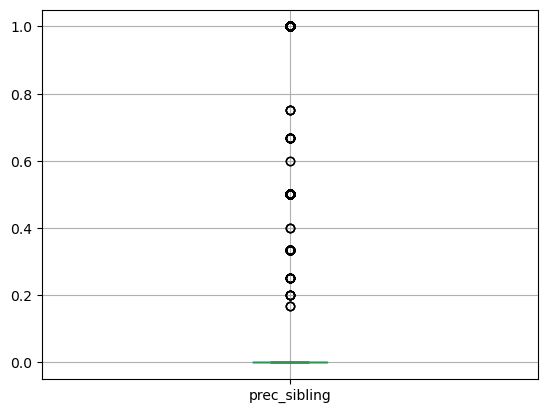

In [546]:

boxplot = df.boxplot(column=['prec_sibling'])
boxplot


In [547]:
df[['Sibling_atopic','P13D3','P13C3','P13E3','siblings','has_siblings','first_born']].sample(20)

,Sibling_atopic,P13D3,P13C3,P13E3,siblings,has_siblings,first_born
2333,NaN,NaN,NaN,1.0,2,1,0
1843,1.0,0.0,1.0,0.0,3,1,0
2821,NaN,NaN,NaN,NaN,1,0,0
3136,NaN,NaN,NaN,NaN,2,1,0
2046,0.0,0.0,0.0,0.0,1,1,0
4329,0.0,0.0,0.0,0.0,0,0,1
3649,0.0,0.0,0.0,0.0,2,1,0
2862,0.0,0.0,0.0,0.0,2,1,0
4582,0.0,0.0,0.0,0.0,2,1,0
4456,NaN,NaN,NaN,NaN,0,0,1


### Smoking
Considering all smoking variable to one - "Smoking in houshold"

In [548]:
 # number of people in houshold who smoke
 # number of cigarettes, number of people smoke prenatal


 df[['MWJ3', 'M9J3', 'M6J3', 'M3J3','P10' , 'P11']].sum() 

MWJ3     240.0
M9J3     255.0
M6J3     282.0
M3J3     325.0
P10     5516.0
P11     1313.0
dtype: float64

In [43]:
smokers = ['MWJ3', 'M9J3', 'M6J3', 'M3J3','P10' , 'P11']

df['Smoking'] = df[smokers].apply(lambda x: 1 if x.any()>0 else 0, axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_50020\3749331955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Smoking'] = df[smokers].apply(lambda x: 1 if x.any()>0 else 0, axis=1)


In [44]:
df['Smoking'].value_counts()

0    3692
1    1210
Name: Smoking, dtype: int64

In [45]:
#df[df['P10']>0,'P10']
 #.sum()

df[['MWJ3', 'M9J3', 'M6J3', 'M3J3','P10' , 'P11','Smoking']].sample(20)

,MWJ3,M9J3,M6J3,M3J3,P10,P11,Smoking
4557,NaN,NaN,NaN,NaN,0.0,0.0,0
522,0.0,0.0,0.0,0.0,0.0,0.0,0
1826,0.0,0.0,0.0,0.0,0.0,0.0,0
413,NaN,NaN,NaN,NaN,0.0,0.0,0
1035,0.0,0.0,0.0,NaN,0.0,0.0,0
2697,NaN,NaN,NaN,NaN,0.0,0.0,0
3111,NaN,NaN,NaN,NaN,0.0,0.0,0
2605,NaN,NaN,0.0,0.0,0.0,0.0,0
4886,NaN,NaN,NaN,NaN,0.0,1.0,1
4761,NaN,NaN,NaN,NaN,8.0,3.0,1


### Diagnosis
AD past 2 weeks

In [46]:
AD = ['M2A20M', 'M3A20M', 'M4A22M', 'M5A25M', 'M6A24M', 'M7A24M', 'M9A29M', 'MWA27M', 'MXA30M']

df['AD_diagnosis'] = df[AD].apply(lambda x: 1 if x.any()>0 else 0, axis=1)

df['AD_diagnosis'].value_counts(normalize=True)

C:\Users\User\AppData\Local\Temp\ipykernel_50020\382245982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AD_diagnosis'] = df[AD].apply(lambda x: 1 if x.any()>0 else 0, axis=1)


0    0.894125
1    0.105875
Name: AD_diagnosis, dtype: float64

### Antibiotics
Antibiotics perscribed during the first 6m\
Answered the question : Baby received antibiotics past 2 weeks\
from 2m to 6m

In [47]:
antibiotics = ['M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A'] #Antibiotics in the first 6 months

df['Infant_Antibiotics'] = df[antibiotics].eq(1).any(axis=1).astype(int)

df['Infant_Antibiotics'].value_counts(normalize=False)

C:\Users\User\AppData\Local\Temp\ipykernel_50020\59850308.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Infant_Antibiotics'] = df[antibiotics].eq(1).any(axis=1).astype(int)


0    4330
1     572
Name: Infant_Antibiotics, dtype: int64

In [48]:
df['Infant_Antibiotics'].value_counts(normalize=True)

0    0.883313
1    0.116687
Name: Infant_Antibiotics, dtype: float64

In [49]:
df[['M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A','Infant_Antibiotics']].sample(10)

,M2A21A,M3A21A,M4A23A,M5A26A,M6A25A,Infant_Antibiotics
2651,NaN,NaN,NaN,NaN,NaN,0
1591,NaN,NaN,NaN,NaN,NaN,0
2213,2.0,2.0,2.0,1.0,1.0,1
1520,NaN,NaN,NaN,NaN,NaN,0
766,2.0,2.0,2.0,2.0,2.0,0
4570,NaN,NaN,NaN,NaN,NaN,0
988,2.0,2.0,2.0,2.0,2.0,0
1463,2.0,2.0,2.0,2.0,2.0,0
2729,NaN,NaN,NaN,NaN,NaN,0
974,2.0,2.0,2.0,2.0,1.0,1


## The table with the new variables
To match FA algorithm (for validation)

In [50]:
# from due date to season

df['due_month'] = pd.DatetimeIndex(df['P2']).month

df.due_month

#df.loc[df.due_month.isin([9,10,11])]

C:\Users\User\AppData\Local\Temp\ipykernel_50020\152843343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['due_month'] = pd.DatetimeIndex(df['P2']).month


0       10.0
1       12.0
2        2.0
3        7.0
4        1.0
        ... 
4897     3.0
4898     3.0
4899     2.0
4900     4.0
4901     3.0
Name: due_month, Length: 4902, dtype: float64

In [51]:
def season (row):
    autumn = np.array([9,10,11])
    summer = np.array([6,7,8])
    winter = np.array([12,1,2])
    spring = np.array([3,4,5])
    res = []
    if row in (autumn) :
        res = "Autumn"
    if row in (summer) :
        res = "Summer"
    if row in(winter) : 
        res = "Winter"
    if row in(spring) : 
        res = "Spring"    
    return res

df['Season'] = df.due_month.apply(lambda x: season(x))

#df['Season'] = season(df.loc[], 'due_month')

#test_sea = df.loc[3,'due_month']
#print (test_sea)
#print(season(test_sea))

df['Season'].value_counts()


C:\Users\User\AppData\Local\Temp\ipykernel_50020\911683345.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df.due_month.apply(lambda x: season(x))


Winter    1905
Autumn    1756
Summer     981
Spring     223
[]          37
Name: Season, dtype: int64

In [52]:
#df['Season']

df[df['Season'].isna()]

,SAMPMIQ,RACE,N1,P2,DENSITY,MWJ3,M9J3,M6J3,M3J3,P10,P11,P13D1,P13D2,P13D3,M2A20M,M3A20M,M4A22M,M5A25M,M6A24M,M7A24M,M9A29M,MWA27M,MXA30M,P13C3,P13E3,P13C1,P13E1,P13C2,P13E2,HH_SIZE,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,M2A21A,M3A21A,M4A23A,M5A26A,M6A25A,M7A25A,M9A28A,MWA28A,MXA31A,P41_2,FA_diganosis,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,dwelling3,dwelling,has_siblings,sibling_AGE1,sibling_AGE2,sibling_AGE3,sibling_AGE4,sibling_AGE5,sibling_AGE6,siblings,first_born,Maternal_atopic,Parental_FA,Paternal_atopic,Parental_atopic,Sibling_atopic,prec_sibling,Smoking,AD_diagnosis,Infant_Antibiotics,due_month,Season


In [53]:
#df_season = pd.get_dummies(df["Season"])

df_season = pd.get_dummies(df.Season.apply(pd.Series).stack()).sum(level=0)


df = pd.concat((df_season, df), axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_50020\3622613752.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_season = pd.get_dummies(df.Season.apply(pd.Series).stack()).sum(level=0)
C:\Users\User\AppData\Local\Temp\ipykernel_50020\3622613752.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_season = pd.get_dummies(df.Season.apply(pd.Series).stack()).sum(level=0)


In [54]:
df['Gender'] = np.where(df['N1']==1,1,0)
print(df['Gender'].value_counts())
print(df['N1'].value_counts())

0    3401
1    1501
Name: Gender, dtype: int64
2.0    1529
1.0    1501
Name: N1, dtype: int64


In [55]:
df.columns

Index(['Autumn', 'Spring', 'Summer', 'Winter', 'SAMPMIQ', 'RACE', 'N1', 'P2',
       'DENSITY', 'MWJ3', 'M9J3', 'M6J3', 'M3J3', 'P10', 'P11', 'P13D1',
       'P13D2', 'P13D3', 'M2A20M', 'M3A20M', 'M4A22M', 'M5A25M', 'M6A24M',
       'M7A24M', 'M9A29M', 'MWA27M', 'MXA30M', 'P13C3', 'P13E3', 'P13C1',
       'P13E1', 'P13C2', 'P13E2', 'HH_SIZE', 'AGE1', 'AGE2', 'AGE3', 'AGE4',
       'AGE5', 'AGE6', 'M2A21A', 'M3A21A', 'M4A23A', 'M5A26A', 'M6A25A',
       'M7A25A', 'M9A28A', 'MWA28A', 'MXA31A', 'P41_2', 'FA_diganosis',
       '2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance', 'dwelling3', 'dwelling', 'has_siblings', 'sibling_AGE1',
       'sibling_AGE2', 'sibling_AGE3', 'sibling_AGE4', 'sibling_AGE5',
       'sibling_AGE6', 'siblings', 'first_born', 'Maternal_atopic',
       'Parental_FA', 'Paternal_atopic', 'Parental_atopic', 'Sibling_atopic',
       'prec_sibling', 'Smoking', 'AD_d

In [56]:
df.loc[(df['4_compliance']==0) & (df['9_compliance']==0) & 
       (df['W_compliance']==0)][['2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance']].sum()


2_compliance     55
3_compliance     76
4_compliance      0
5_compliance     59
6_compliance     66
7_compliance     71
9_compliance      0
X_compliance    127
W_compliance      0
dtype: int64

In [57]:
# Full var

df_pred = df[['SAMPMIQ','dwelling','N1','Gender', 'Autumn', 'Spring', 'Summer', 'Winter', #'P2', #'RACE',
    'FA_diganosis','AD_diagnosis','Infant_Antibiotics','Smoking',
    'first_born','P13E3','prec_sibling','Parental_atopic',
     '2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance',
     'P41_2','RACE','Season','Sibling_atopic','siblings','Parental_FA']]
   # 'Maternal_atopic','Paternat_atopic']]

df_pred

,SAMPMIQ,dwelling,N1,Gender,Autumn,Spring,Summer,Winter,FA_diganosis,AD_diagnosis,Infant_Antibiotics,Smoking,first_born,P13E3,prec_sibling,Parental_atopic,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0
1,b'00000639',0,NaN,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,1.0,1.0,1,1,1,1,1,1,1,1,1,0.0,2.0,Winter,1.0,1,1
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4249,b'02512015',1,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0.0,1.0,[],0.0,0,0
4287,b'02525342',0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0.0,1.0,[],0.0,1,0
4411,b'02561537',0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0.0,0.0,1,1,1,1,1,1,1,1,1,0.0,1.0,[],0.0,2,0
4660,b'02643578',0,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,1,NaN,0.0,NaN,1,1,1,1,1,1,1,1,1,0.0,1.0,[],NaN,0,0


## Exclusion criteria
1. Compliance - Removing patients who did not finish 12m questionnaire, n=3095 \
(sample of 4902 pregnant women began the study, and ∼2000 continued through their infant's first year.) (n=1807)
2. Removing patients without gender (n=2)
3. Removing adoped children (n=43) \
\
Total population: N=1764 \
n_FA=169 (9%) \
n_Control=1595 

In [58]:
df_pred.shape

(4902, 31)

In [59]:
# Compliance
df_pred = df_pred[df_pred['W_compliance']==0]
#df_pred = df_pred[(df['4_compliance']==0) & (df['9_compliance']==0) & (df['W_compliance']==0)] # The months where they were asked about FA diagnosis
df_pred.shape

(1807, 31)

In [60]:
# Gender
df_pred = df_pred[df_pred.N1.notna()]
df_pred.shape

(1805, 31)

In [61]:
# Only non adopted children
df_pred = df_pred[df_pred['P41_2']==0]
df_pred.shape

(1764, 31)

In [62]:
df_pred

,SAMPMIQ,dwelling,N1,Gender,Autumn,Spring,Summer,Winter,FA_diganosis,AD_diagnosis,Infant_Antibiotics,Smoking,first_born,P13E3,prec_sibling,Parental_atopic,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0
5,b'00004026',0,1.0,1,1.0,0.0,0.0,0.0,0,0,0,0,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,NaN,Autumn,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,b'02721732',0,1.0,1,0.0,0.0,0.0,1.0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0
4875,b'02738322',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,1,0,0.0,0.5,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,1.0,2,0
4881,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0.0,1.0,Spring,NaN,1,0
4895,b'02757061',1,1.0,1,0.0,0.0,0.0,1.0,0,0,1,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,2,0


In [63]:
print(df_pred.FA_diganosis.value_counts(normalize=False))
print(df_pred.FA_diganosis.value_counts(normalize=True))

0    1595
1     169
Name: FA_diganosis, dtype: int64
0    0.904195
1    0.095805
Name: FA_diganosis, dtype: float64


# Algorithm Validation

In [64]:
import pickle

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_1YO_no_a.sav', 'rb')
meta = pickle.load(file)

# AUC=77, Presicion=9, Recall=58, Accuracy=79 (TH=0.12) 

In [65]:
meta.feature_names_in_

array(['Gender', 'Urban', 'Smoking', 'Parent Atopic Condition',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter'], dtype=object)

In [66]:
#meta.get_config()

In [67]:
df_pred = df_pred.rename(columns={'FA_diganosis':'Target',
                        'Gender':'Gender',
                        'dwelling':'Urban',
                        #'Smoking':'Smoking',
                        'Parental_atopic':'Parent Atopic Condition',
                        'first_born' : 'First Born',
                        'P13E3':'Sibling Food Allergies',
                        'prec_sibling':'Percent of Siblings with Atopic',
                        'AD_diagnosis' : 'Infant Atopic Dermatitis',
                        'Infant_Antibiotics' : 'Infant Systemic Antibiotics',
                        'Autumn':'Season of birth: Autumn',
                        'Summer':'Season of birth: Summer',
                        'Winter':'Season of birth: Winter',
                        'Spring':'Season of birth: Spring'
                        })

In [68]:
df_pred1 = df_pred[['Gender', 'Urban', 'Smoking', 
                    'Parent Atopic Condition','First Born', 'Sibling Food Allergies',
                     'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
                     'Season of birth: Autumn','Season of birth: Summer', 'Season of birth: Winter','Target']]      
       

In [69]:
df_pred1 = df_pred1.fillna(0)
df_pred1

,Gender,Urban,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,Target
0,0,0,1,2.0,0,0.0,0.5,0,1,1.0,0.0,0.0,0
2,0,1,0,0.0,0,1.0,1.0,0,0,0.0,0.0,1.0,1
3,1,0,0,2.0,1,0.0,0.0,0,0,0.0,1.0,0.0,0
4,0,1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0
5,1,0,0,1.0,1,0.0,0.0,0,0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,1,0,1,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,0
4875,0,0,1,0.0,0,0.0,0.5,0,0,0.0,0.0,1.0,0
4881,0,1,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0
4895,1,1,0,0.0,0,0.0,0.0,0,1,0.0,0.0,1.0,0


In [70]:
feature_cols = ['Gender', 'Urban', 'Smoking', 
                    'Parent Atopic Condition','First Born', 'Sibling Food Allergies',
                     'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
                     'Season of birth: Autumn','Season of birth: Summer', 'Season of birth: Winter']
X = df_pred1[feature_cols] # Features
y = df_pred1['Target']

In [71]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [72]:
y_pred = (meta.predict(X) >= 0.12).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[938 657]
 [ 56 113]]
Accuracy: 0.5958049886621315
Precision: 0.14675324675324675
Recall: 0.6686390532544378
roc_auc_score: 0.6574335478844764


In [252]:
# AUC=77, Presicion=9, Recall=58, Accuracy=79 (TH=0.12) 

In [578]:
from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (round(lower,2), round(upper,2))

In [579]:
y_pred = meta.predict(X)

roc_auc_ci(y, y_pred, positive=1)

(0.61, 0.7)

In [581]:
# Bootsrap CI computation

from scipy.stats import sem
from sklearn.metrics import roc_auc_score

ytest = y
ytest_len = len(y)
indices = range(ytest_len)
ytest.index = indices

y_true = y
y_pred = y_pred

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    #if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
    #    continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.657
Bootstrap #1 ROC area: 0.643
Bootstrap #2 ROC area: 0.643
Bootstrap #3 ROC area: 0.693
Bootstrap #4 ROC area: 0.679
Bootstrap #5 ROC area: 0.626
Bootstrap #6 ROC area: 0.693
Bootstrap #7 ROC area: 0.629
Bootstrap #8 ROC area: 0.687
Bootstrap #9 ROC area: 0.687
Bootstrap #10 ROC area: 0.609
Bootstrap #11 ROC area: 0.711
Bootstrap #12 ROC area: 0.678
Bootstrap #13 ROC area: 0.678
Bootstrap #14 ROC area: 0.656
Bootstrap #15 ROC area: 0.685
Bootstrap #16 ROC area: 0.665
Bootstrap #17 ROC area: 0.663
Bootstrap #18 ROC area: 0.705
Bootstrap #19 ROC area: 0.686
Bootstrap #20 ROC area: 0.650
Bootstrap #21 ROC area: 0.679
Bootstrap #22 ROC area: 0.663
Bootstrap #23 ROC area: 0.665
Bootstrap #24 ROC area: 0.680
Bootstrap #25 ROC area: 0.652
Bootstrap #26 ROC area: 0.670
Bootstrap #27 ROC area: 0.643
Bootstrap #28 ROC area: 0.699
Bootstrap #29 ROC area: 0.580
Bootstrap #30 ROC area: 0.665
Bootstrap #31 ROC area: 0.649
Bootstrap #32 ROC area: 0.655
Bootstrap #33 ROC area: 

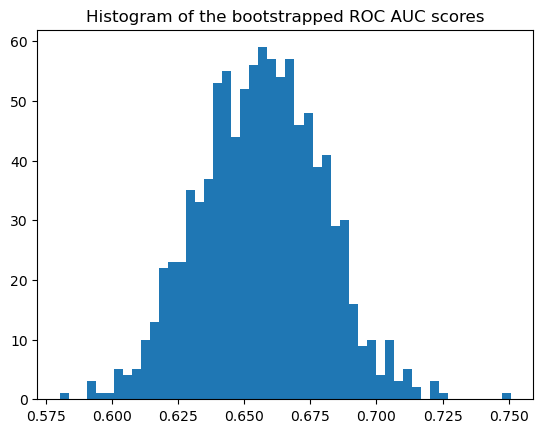

In [582]:
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

In [584]:
# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} , {:0.3}]".format(
    confidence_lower, confidence_upper))

print(round(np.mean(bootstrapped_scores),2))    

Confidence interval for the score: [0.619 , 0.693]
0.66


In [586]:
#auc_df = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\auc_bootstrap.csv')

auc_df.loc[:,'1Y_val'] = bootstrapped_scores
auc_df

,FULL,No SES,No prg,Parental Atopic,Infant AD,1Y FULL,1Y NoPrg,ParentalAtopic_val,InfantAD_val,1Y_val
0,0.883021,0.857052,0.798879,0.582837,0.543335,0.820972,0.784117,0.542979,0.642063,0.643154
1,0.889139,0.871244,0.806550,0.581551,0.539664,0.837441,0.786829,0.520450,0.606698,0.643328
2,0.880016,0.866958,0.805268,0.587479,0.543761,0.812804,0.770310,0.563474,0.634657,0.692523
3,0.875337,0.847827,0.790466,0.586005,0.543870,0.823017,0.779654,0.537571,0.617359,0.678809
4,0.873368,0.852948,0.800525,0.589405,0.547249,0.833978,0.780276,0.570533,0.599501,0.625741
...,...,...,...,...,...,...,...,...,...,...
995,0.883655,0.867347,0.803682,0.576331,0.548805,0.832007,0.772085,0.536505,0.709657,0.666130
996,0.873648,0.859129,0.791837,0.572546,0.535133,0.831352,0.780943,0.508412,0.548608,0.666809
997,0.880079,0.874867,0.812770,0.576686,0.546758,0.831956,0.786666,0.525078,0.621603,0.668739
998,0.879675,0.863927,0.802757,0.588157,0.541389,0.835315,0.767302,0.555580,0.653670,0.670768


In [588]:
auc_df.loc[:,'6Y_val'] = auc_val_on_4
auc_df

,FULL,No SES,No prg,Parental Atopic,Infant AD,1Y FULL,1Y NoPrg,ParentalAtopic_val,InfantAD_val,1Y_val,6Y_val
0,0.883021,0.857052,0.798879,0.582837,0.543335,0.820972,0.784117,0.542979,0.642063,0.643154,0.749461
1,0.889139,0.871244,0.806550,0.581551,0.539664,0.837441,0.786829,0.520450,0.606698,0.643328,0.676032
2,0.880016,0.866958,0.805268,0.587479,0.543761,0.812804,0.770310,0.563474,0.634657,0.692523,0.729412
3,0.875337,0.847827,0.790466,0.586005,0.543870,0.823017,0.779654,0.537571,0.617359,0.678809,0.675006
4,0.873368,0.852948,0.800525,0.589405,0.547249,0.833978,0.780276,0.570533,0.599501,0.625741,0.701018
...,...,...,...,...,...,...,...,...,...,...,...
995,0.883655,0.867347,0.803682,0.576331,0.548805,0.832007,0.772085,0.536505,0.709657,0.666130,0.714630
996,0.873648,0.859129,0.791837,0.572546,0.535133,0.831352,0.780943,0.508412,0.548608,0.666809,0.729263
997,0.880079,0.874867,0.812770,0.576686,0.546758,0.831956,0.786666,0.525078,0.621603,0.668739,0.770031
998,0.879675,0.863927,0.802757,0.588157,0.541389,0.835315,0.767302,0.555580,0.653670,0.670768,0.706666


In [589]:
#auc_df.to_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\auc_bootstrap.csv')

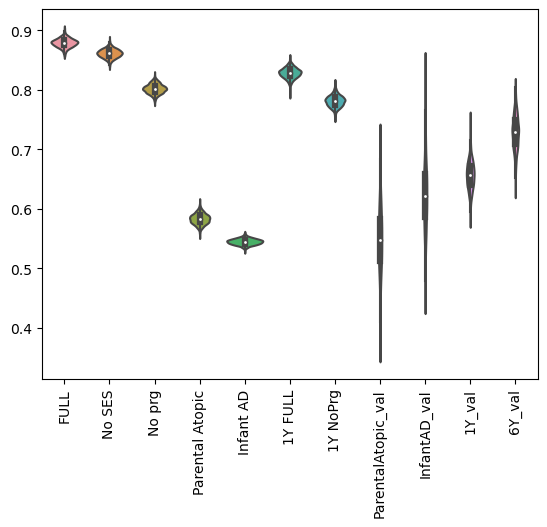

In [597]:
sns.violinplot(data=auc_df)
plt.xticks(rotation=90)
plt.show()

In [203]:
# Results table
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    cm = confusion_matrix(y, labels)
    FP = cm[0][1]
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    scores.append([n,FP,TN,TP,FN])
    result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result


,TH,FP,TN,TP,FN
0,0.10,766,829,122,47
1,0.15,610,985,104,65
2,0.20,459,1136,91,78
3,0.25,380,1215,80,89
4,0.30,308,1287,62,107
5,0.40,190,1405,42,127
6,0.50,78,1517,21,148


In [204]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    prob = meta.predict(X)
    report = classification_report(y, labels, output_dict=True)
    precision_value = report['1']['precision']
    recall_value = report['1']['recall']
    accuracy_value = report['accuracy']
    F1_score = report['1']['f1-score']
    fpr, tpr, thresholds = roc_curve(y, prob, pos_label=1)
    auc_score = roc_auc_score(y, meta.predict(X))
    ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))
    cm = confusion_matrix(y, labels)
    scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
    result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.137387,0.721893,0.539116,0.230842,0.657434,0.027467
1,0.15,0.145658,0.615385,0.617347,0.235561,0.657434,0.027467
2,0.20,0.165455,0.538462,0.695578,0.253129,0.657434,0.027467
3,0.25,0.173913,0.473373,0.734127,0.254372,0.657434,0.027467
4,0.30,0.167568,0.366864,0.764739,0.230056,0.657434,0.027467
5,0.40,0.181034,0.248521,0.820295,0.209476,0.657434,0.027467
6,0.50,0.212121,0.124260,0.871882,0.156716,0.657434,0.027467


In [255]:
y_pred = meta.predict(X)
y_pred

array([0.50070707, 0.14473025, 0.08739084, ..., 0.02055229, 0.39418793,
       0.03556969])

In [256]:
df_pred['y_pred'] = y_pred.tolist()
df_pred

,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,y_pred
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,0.500707
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,0.144730
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.087391
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.035570
5,b'00004026',0,1.0,1,1.0,0.0,0.0,0.0,0,0,0,0,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.083100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,b'02721732',0,1.0,1,0.0,0.0,0.0,1.0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.031610
4875,b'02738322',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,1,0,0.0,0.5,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.040547
4881,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.020552
4895,b'02757061',1,1.0,1,0.0,0.0,0.0,1.0,0,0,1,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.394188


In [257]:
df_pred[df_pred['y_pred']>0.2].Target.value_counts(normalize=True)

0    0.832474
1    0.167526
Name: Target, dtype: float64

In [258]:
df_pred[df_pred['y_pred']<=0.2].Target.value_counts(normalize=True)

0    0.924419
1    0.075581
Name: Target, dtype: float64

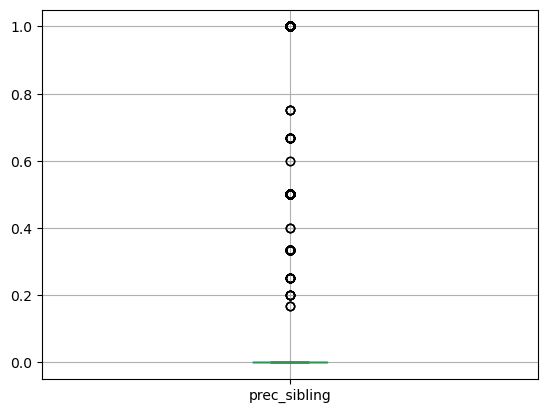

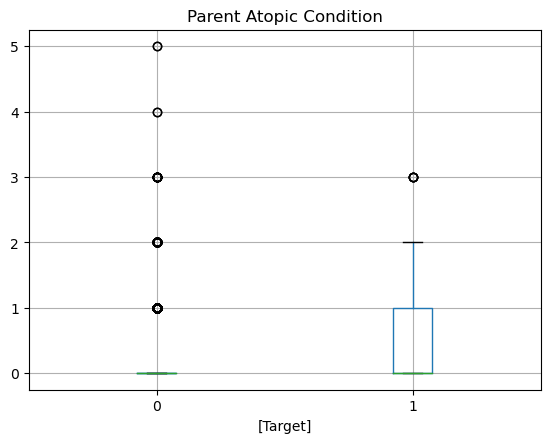

In [259]:
import matplotlib.pyplot as plt

df_pred.boxplot(column=['Parent Atopic Condition'], by=['Target'])
plt.title("Parent Atopic Condition")
plt.suptitle("")
plt.show()


In [260]:
df_pred[df_pred['Parent Atopic Condition']>3]

,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,y_pred
424,b'00493495',0,1.0,1,1.0,0.0,0.0,0.0,0,0,0,0,0,1.0,1.0,4.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.767054
1326,b'01632139',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,1.0,1.0,5.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.328911
4629,b'02634580',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,4.0,0,1,0,0,0,0,0,0,0,0.0,1.0,0.080337
4650,b'02640313',0,1.0,1,0.0,0.0,0.0,1.0,0,1,1,0,0,0.0,1.0,5.0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.761111


In [261]:
df[df.index==424][['2_compliance', '3_compliance', '4_compliance', '5_compliance','6_compliance', '7_compliance', '9_compliance', 'X_compliance', 'W_compliance']]

,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance
424,0,0,0,0,0,0,0,0,0


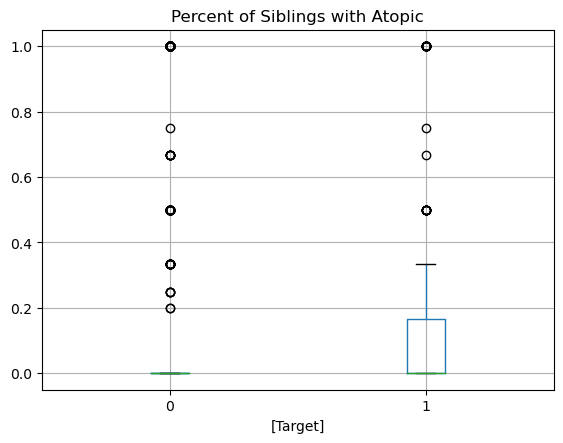

In [262]:
df_pred.boxplot(column=['Percent of Siblings with Atopic'], by=['Target'])
plt.title("Percent of Siblings with Atopic")
plt.suptitle("")
plt.show()


In [263]:
df_pred[(df_pred['Percent of Siblings with Atopic']==1) & (df_pred['Target']==0)].mean()

SAMPMIQ                                 inf
Urban                              0.373913
N1                                 1.521739
Gender                             0.478261
Season of birth: Autumn            0.321739
Season of birth: Spring            0.017391
Season of birth: Summer            0.295652
Season of birth: Winter            0.365217
Target                             0.000000
Infant Atopic Dermatitis           0.330435
Infant Systemic Antibiotics        0.226087
Smoking                            0.173913
First Born                         0.000000
Sibling Food Allergies             0.313043
Percent of Siblings with Atopic    1.000000
Parent Atopic Condition            0.791304
2_compliance                       0.069565
3_compliance                       0.139130
4_compliance                       0.095652
5_compliance                       0.113043
6_compliance                       0.147826
7_compliance                       0.147826
9_compliance                    

In [264]:
df_pred[(df_pred['Percent of Siblings with Atopic']==1) & (df_pred['Target']==1)].mean()

SAMPMIQ                            5.780000e+193
Urban                               3.600000e-01
N1                                  1.640000e+00
Gender                              3.600000e-01
Season of birth: Autumn             2.000000e-01
Season of birth: Spring             4.000000e-02
Season of birth: Summer             4.000000e-01
Season of birth: Winter             3.600000e-01
Target                              1.000000e+00
Infant Atopic Dermatitis            4.000000e-01
Infant Systemic Antibiotics         3.200000e-01
Smoking                             2.400000e-01
First Born                          0.000000e+00
Sibling Food Allergies              6.400000e-01
Percent of Siblings with Atopic     1.000000e+00
Parent Atopic Condition             1.000000e+00
2_compliance                        4.000000e-02
3_compliance                        8.000000e-02
4_compliance                        8.000000e-02
5_compliance                        0.000000e+00
6_compliance        

In [265]:
df_pred.groupby(by=["Target"]).mean()

,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,y_pred
Target,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.299060,1.514107,0.485893,0.363009,0.012539,0.230094,0.394357,0.194357,0.210031,0.183699,0.277116,0.035110,0.096541,0.322257,0.052038,0.087774,0.099060,0.089655,0.099060,0.09906,0.100940,0.141693,0.0,0.0,1.211285,0.133926
1,0.337278,1.473373,0.526627,0.372781,0.029586,0.201183,0.396450,0.414201,0.254438,0.248521,0.260355,0.142012,0.196252,0.437870,0.047337,0.059172,0.047337,0.029586,0.094675,0.12426,0.112426,0.171598,0.0,0.0,1.213018,0.233335


In [266]:
df_pred.groupby(by=["Target"]).std()

,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,y_pred
Target,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.457990,0.499958,0.499958,0.481018,0.111309,0.421025,0.488865,0.395829,0.407458,0.38736,0.447715,0.184115,0.273421,0.659055,0.222173,0.283055,0.298836,0.285777,0.298836,0.298836,0.301344,0.348844,0.0,0.0,0.745458,0.167611
1,0.474186,0.500774,0.500774,0.484982,0.169945,0.402076,0.490613,0.494047,0.436839,0.43344,0.440132,0.350100,0.366228,0.762193,0.212990,0.236647,0.212990,0.169945,0.293635,0.330859,0.316829,0.378151,0.0,0.0,0.817704,0.235668


## 6 Year Follow up

In [209]:
# Read 6Y follow up file:

df_6y = pd.read_sas("C:\\Users\\User\\Downloads\\Y6FU.sas7bdat")  

In [210]:
#df_6y[['y6e15a2','Y6E15_flag']].sample(20) #birth date

df_6y

# Y6b4 , Y6b6
# Y6e28 - Y6_age (weeks)

,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,Y6state,y6a1a1,y6a1a2,y6a1a3,y6a1b1,y6a1b2,y6a1b3,y6a1c1,y6a1c2,y6a1c3,y6a1d1,y6a1d2,y6a1d3,y6a1e1,y6a1e2,y6a1e3,y6a1f1,y6a1f2,y6a1f3,y6a2a,y6a2b,y6a2c,Y6a3,y6a4a,y6a4b,Y6a5,Y6a6a,Y6a6b,Y6a6c,Y6a6d,Y6a6e,Y6a6f,Y6a6g,Y6a6h,Y6a7,Y6a8,Y6a9,Y6a10a,Y6a10b,Y6a10c,Y6a10d,Y6a10e,Y6a10f,Y6a10g,Y6a10h,Y6a10i,Y6a10j,Y6a10k,Y6a10l,Y6a10m,Y6a10n,Y6a10o,Y6a10p,Y6a10q,Y6a10r,Y6a10s,Y6a10t,Y6a10u,Y6a10v,Y6a10w,Y6a10x,Y6a10y,Y6b1,Y6b2,Y6b3,Y6b4,Y6b5,Y6b6,Y6b7,Y6b8a,Y6b8b,Y6b9,Y6b10a,Y6b10b,Y6b11,Y6b12,Y6b13,Y6b14a,Y6b14b,Y6b14c,y6b15a,y6b15b,y6b15c,y6b15d,y6b16a,y6b16b,y6b16c,y6b16d,y6b16e,y6b16f,Y6b17,Y6b18,Y6b19,y6b20a,y6b20b,y6b20c,y6b20d,y6b20e,y6b20f,y6b20g,y6b20h,y6b20i,y6b20j,y6b20k,y6b20l,y6b20m,y6b20n,y6b20o,y6b20p,y6b20q,y6b20r,y6b20s,y6b20v,Y6b20mrk,Y6b21a,Y6b21b,Y6b21c,Y6b21d,Y6b21e,Y6b21f,Y6b21g,Y6b21h,Y6b21i,Y6b21j,Y6b22a_a,Y6b22a_b,Y6b22a_c,Y6b22a_d,Y6b22a_e,Y6b22a_f,Y6b22a_g,Y6b22a_h,Y6b22a_i,Y6b22b_a,Y6b22b_b,Y6b22b_c,Y6b22b_d,Y6b22b_e,Y6b22b_f,Y6b22b_g,Y6b22b_h,Y6b22b_i,Y6b22c_a,Y6b22c_b,Y6b22c_c,Y6b22c_d,Y6b22c_e,Y6b22c_f,Y6b22c_g,Y6b22c_h,Y6b22c_i,y6b23a1,y6b23a2,y6b23a3,y6b23b1,y6b23b2,y6b23b3,y6b23c1,y6b23c2,y6b23c3,y6b23d1,y6b23d2,y6b23d3,Y6b24a,Y6b24b,Y6b24c,Y6b24d,Y6b24e,Y6b24f,Y6b24g,Y6b24h,Y6b25a,Y6b25b,Y6b25c,Y6b26a,Y6b26b,Y6b26c,Y6b26d,Y6b26e,Y6b26f,Y6b26g,Y6b26h,Y6b27a,Y6b27b,Y6b27c,Y6b28a,Y6b28b,Y6b28c,Y6b28d,Y6b28e,Y6b28f,Y6b28g,Y6b28h,Y6b28i,Y6b28j,Y6b28k,Y6b28l,Y6b28m,Y6b28n,Y6b28o,Y6b28p,Y6b28q,Y6b28r,Y6b28s,Y6b29a,Y6b29b,Y6b29c,Y6b30,Y6b31,Y6b32a,Y6b32b,Y6b32c,Y6b32d,Y6b32e,Y6b32f,Y6b32g,Y6b32h,Y6b32i,Y6b32j,Y6b32k,Y6b32l,Y6b32m,Y6b32n,Y6b32o,Y6b32p,Y6b33,Y6c1,Y6c2,Y6c3,Y6c4a,Y6c4b,Y6c5,Y6c6,Y6c7,Y6c8,Y6c9,Y6d1a,Y6d1b,Y6d1c,Y6d1d,Y6d1e,Y6d1f,Y6d2a,Y6d2b,Y6d2c,Y6d3,Y6d4,Y6d5,Y6d6,Y6d7a,Y6d7b,Y6d7c,Y6d7d,Y6d7e,Y6d7f,Y6d7g,Y6D8,Y6d9,Y6d10,Y6d11,Y6d12,Y6d13a,Y6d13b,Y6d13c,Y6d13d,Y6d13e,Y6d13f,Y6d13g,Y6d13h,Y6d13i,Y6d13j,Y6d13k,Y6d13l,Y6d13m,Y6d13n,Y6d13o,Y6d13p,Y6d13q,Y6d13r,Y6d13s,Y6d13t,Y6d13u,Y6d13v,Y6d13w,Y6d13x,Y6d13y,Y6d13z,Y6d13aa,Y6d13bb,Y6d14a,Y6d14b,Y6d14c,Y6d15a,Y6d15b,Y6d15c,Y6d15d,Y6d15e,Y6d15f,Y6d15g,Y6d15h,Y6e1a1,Y6e1a2,Y6e1a3,Y6e1a4,Y6e1a5,Y6e1b1,Y6e1b2,Y6e1b3,Y6e1b4,Y6e1b5,Y6e1c1,Y6e1c2,Y6e1c3,Y6e1c4,Y6e1c5,Y6e1d1,Y6e1d2,Y6e1d3,Y6e1d4,Y6e1d5,Y6e1e1,Y6e1e2,Y6e1e3,Y6e1e4,Y6e1e5,Y6e1f1,Y6e1f2,Y6e1f3,Y6e1f4,Y6e1f5,Y6e1g1,Y6e1g2,Y6e1g3,Y6e1g4,Y6e1g5,Y6e1h1,Y6e1h2,Y6e1h3,Y6e1h4,Y6e1h5,Y6e1i1,Y6e1i2,Y6e1i3,Y6e1i4,Y6e1i5,Y6e1j1,Y6e1j2,Y6e1j3,Y6e1j4,Y6e1j5,Y6e1k1,Y6e1k2,Y6e1k3,Y6e1k4,Y6e1k5,Y6e1l1,Y6e1l2,Y6e1l3,Y6e1l4,Y6e1l5,Y6e2,Y6e3,Y6e4,Y6e5,Y6e6,Y6e7,Y6e8,Y6e9,Y6e10,Y6e11a,Y6e11b,Y6e11c,Y6e11d,Y6e11e,Y6e11f,Y6e11g,Y6e11h,Y6e11i,Y6e11j,Y6e12,Y6e13,Y6e14,y6e15a1,y6e15a2,y6e15a3,y6e15a4,y6e15b1,y6e15b2,y6e15b3,y6e15b4,y6e15c1,y6e15c2,y6e15c3,y6e15c4,y6e15d1,y6e15d2,y6e15d3,y6e15d4,y6e15e1,y6e15e2,y6e15e3,y6e15e4,y6e16a,y6e16b,Y6e17,Y6e18,Y6e19a,Y6e19b,Y6e19c,Y6e19d,Y6e20,Y6e21,Y6e22a,Y6e22b,Y6e22c,Y6e22d,Y6e22e,Y6e22f,Y6e23,Y6e24,Y6e25,Y6e26a,Y6e26b,Y6e26c,Y6e27,Y6e28,Y6_age,Y6DCmode,Y6E15_flag,Y6E15a_flag,Y6wtage,Y6htage,y6_waz1,y6_haz1,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag
0,390.0,1.0,3.0,3.0,2.0,1.0,1.0,6.0,2.0,10.0,b'IL',1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0,3.0,NaN,66.4,42.00,19018.0,65.0,19018.0,4.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [223]:
df_6y[['Y6educ','Y6income']].value_counts()

Y6educ  Y6income
7.0     18.0        77
        21.0        74
        20.0        59
5.0     18.0        56
8.0     21.0        45
                    ..
6.0     2.0          1
5.0     25.0         1
4.0     26.0         1
        22.0         1
1.0     9.0          1
Length: 152, dtype: int64

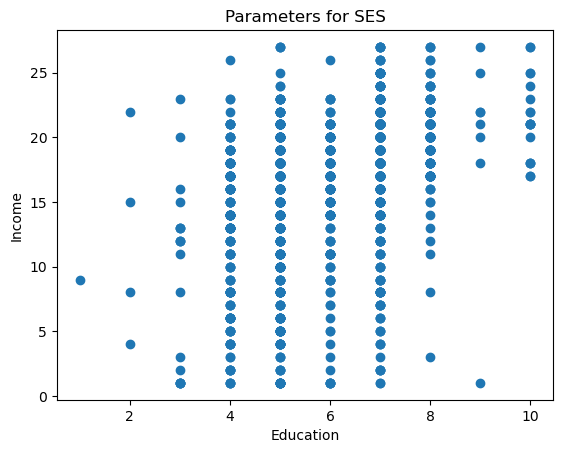

In [225]:
plt.scatter(df_6y['Y6educ'], df_6y['Y6income'])
plt.title("Parameters for SES")
plt.ylabel("Income")
plt.xlabel("Education")
plt.show()

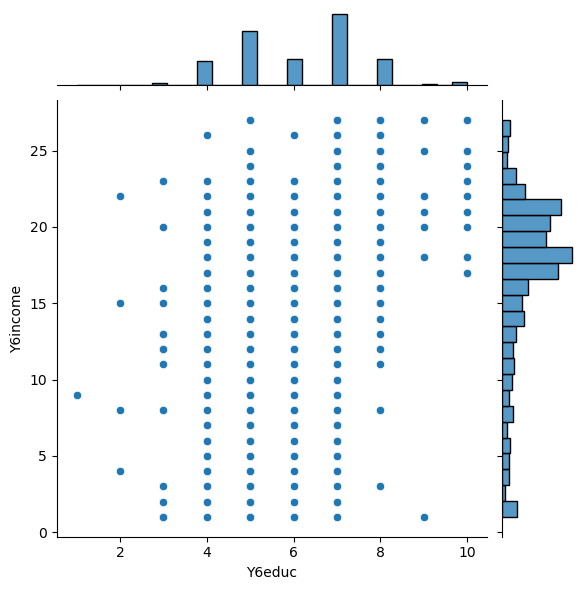

In [227]:
import seaborn as sns
sns.jointplot(data=df_6y, x="Y6educ", y="Y6income") # , hue="SES")

(array([  1.,   4.,  19., 171., 375., 182., 499., 181.,   8.,  20.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

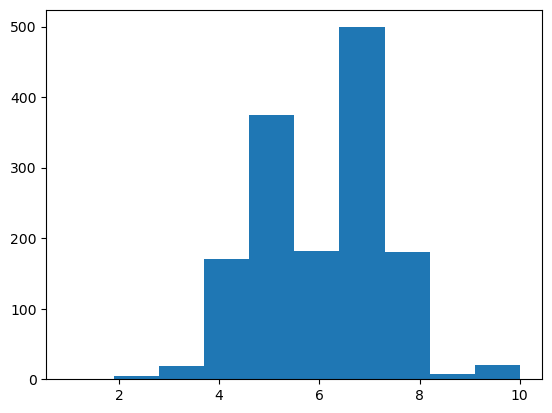

In [231]:
plt.hist(df_6y['Y6educ'])

In [228]:
df_6y['Y6educ'].value_counts(normalize=True)

7.0     0.341781
5.0     0.256849
6.0     0.124658
8.0     0.123973
4.0     0.117123
10.0    0.013699
3.0     0.013014
9.0     0.005479
2.0     0.002740
1.0     0.000685
Name: Y6educ, dtype: float64

In [229]:
df_6y['Y6income'].value_counts(normalize=True)

18.0    0.134561
21.0    0.113314
17.0    0.108357
20.0    0.092776
19.0    0.084278
16.0    0.049575
22.0    0.045326
14.0    0.042493
15.0    0.039660
23.0    0.028329
13.0    0.026912
11.0    0.024079
8.0     0.022663
12.0    0.021955
10.0    0.019830
1.0     0.019122
6.0     0.015581
5.0     0.014873
9.0     0.014873
4.0     0.013456
25.0    0.012748
24.0    0.011331
7.0     0.011331
2.0     0.010623
27.0    0.009915
3.0     0.006374
26.0    0.005666
Name: Y6income, dtype: float64

In [ ]:
df_6y['SES'] = if df_6y['Y6educ']>8 & df_6y['Y6income']>25 = 'High'

In [1008]:
# unkown dates
df_6y['Y6b4'] = pd.to_timedelta(df_6y['Y6b4'], unit='D') + pd.Timestamp('1960-1-1')
df_6y['Y6b4']

0      2012-01-26
1      2012-03-19
2      2011-08-04
3      2011-07-14
4      2011-11-03
          ...    
1537   2012-03-12
1538   2012-01-25
1539   2012-04-09
1540   2012-03-08
1541   2011-03-05
Name: Y6b4, Length: 1542, dtype: datetime64[ns]

In [1009]:
df_6y['Y6b6'] = pd.to_timedelta(df_6y['Y6b6'], unit='D') + pd.Timestamp('1960-1-1')
df_6y['Y6b6']

0      2012-01-26
1      2012-03-19
2      2011-08-04
3      2011-07-14
4      2011-11-03
          ...    
1537   2012-03-12
1538   2012-01-25
1539   2012-04-09
1540   2012-03-08
1541   2011-03-05
Name: Y6b6, Length: 1542, dtype: datetime64[ns]

In [1010]:
#df_6y[['Y6b4','Y6b6','y6e15a2','Y6E15_flag','Y6e28','Y6_age']].sample(20)

# Y6b22b_e. Asthma- Age (y)
# Y6b22c_e. Current asthma
# Y6b25b. Taken to doctor for food allergy > 12 m ago

# Y6e1c1. Asthma: You, Mother
# Y6e1c2. Asthma: Father
# Y6e1c3. Asthma: Brother or Sister
# Y6e1d1. Eczema or skin allergy: You, Mother
# Y6e1d2. Eczema or skin allergy: Father
# Y6e1d3. Eczema or skin allergy: Brother or Sister 
# Y6e1e1. Food allergy: You, Mother
# Y6e1e2. Food allergy: Father
# Y6e1e3. Food allergy: Brother or Sister
# Y6e1f1. Hay fever/respiratory allergy: You, Mother
# Y6e1f2. Hay fever/respiratory allergy: Father
# Y6e1f3. Hay fever/respiratory allergy: Brother or Sister

df_6y[['Y6origmiq','Y6e1c1','Y6e1d1','Y6e1e1','Y6e1f1']].sample(10)


,Y6origmiq,Y6e1c1,Y6e1d1,Y6e1e1,Y6e1f1
1471,2600252.0,0.0,0.0,0.0,0.0
223,538246.0,NaN,NaN,NaN,NaN
1044,2150512.0,0.0,0.0,NaN,0.0
1061,2166394.0,0.0,0.0,0.0,0.0
1257,2344514.0,0.0,0.0,0.0,0.0
1381,2470340.0,0.0,0.0,0.0,0.0
380,1018179.0,0.0,0.0,0.0,0.0
867,1931888.0,0.0,0.0,0.0,0.0
696,1734043.0,0.0,0.0,0.0,1.0
982,2071912.0,0.0,0.0,0.0,0.0


In [1011]:
df_6y['age_weeks'] = pd.to_timedelta(df_6y['Y6_age'], 'w')
df_6y['age_weeks']

df_6y['q_date'] = pd.to_datetime(df_6y['Y6e28'])
df_6y['q_date']                                     

0      2012-04-06
1      2012-04-06
2      2012-04-07
3      2012-05-15
4      2012-04-06
          ...    
1537   2012-05-21
1538   2012-04-17
1539   2012-04-19
1540   2012-05-21
1541   2012-04-09
Name: q_date, Length: 1542, dtype: datetime64[ns]

In [1012]:
from datetime import timedelta

my_date = df_6y['Y6e28'].iloc[1]
my_date
print (my_date - timedelta(weeks=322))

print (df_6y['q_date'].iloc[1] - timedelta(weeks=df_6y['Y6_age'].iloc[1]))

2006-02-03 00:00:00
2006-02-03 00:00:00


In [1013]:
df_6y['birth_date'] = df_6y['q_date'] - df_6y['age_weeks']
df_6y['birth_date']

0      2005-12-02
1      2006-02-03
2      2005-07-30
3      2006-01-17
4      2005-08-12
          ...    
1537   2006-02-20
1538   2006-03-07
1539   2006-02-23
1540   2006-03-20
1541   2006-02-13
Name: birth_date, Length: 1542, dtype: datetime64[ns]

In [1014]:
df_6y['birth_month'] = pd.DatetimeIndex(df_6y['birth_date']).month

df_6y.birth_month

0       12
1        2
2        7
3        1
4        8
        ..
1537     2
1538     3
1539     2
1540     3
1541     2
Name: birth_month, Length: 1542, dtype: int64

In [1015]:
df_6y['Birth_Season'] = df_6y.birth_month.apply(lambda x: season(x))

#df['Season'] = season(df.loc[], 'due_month')

#test_sea = df.loc[3,'due_month']
#print (test_sea)
#print(season(test_sea))

df_6y['Birth_Season'].value_counts()

Winter    606
Autumn    570
Summer    317
Spring     49
Name: Birth_Season, dtype: int64

In [1016]:
df6_season = pd.get_dummies(df_6y.Birth_Season.apply(pd.Series).stack()).sum(level=0)


df_6y = pd.concat((df6_season, df_6y), axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_12576\3130445865.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df6_season = pd.get_dummies(df_6y.Birth_Season.apply(pd.Series).stack()).sum(level=0)


In [1017]:
df_6y

,Autumn,Spring,Summer,Winter,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,Y6state,y6a1a1,y6a1a2,y6a1a3,y6a1b1,y6a1b2,y6a1b3,y6a1c1,y6a1c2,y6a1c3,y6a1d1,y6a1d2,y6a1d3,y6a1e1,y6a1e2,y6a1e3,y6a1f1,y6a1f2,y6a1f3,y6a2a,y6a2b,y6a2c,Y6a3,y6a4a,y6a4b,Y6a5,Y6a6a,Y6a6b,Y6a6c,Y6a6d,Y6a6e,Y6a6f,Y6a6g,Y6a6h,Y6a7,Y6a8,Y6a9,Y6a10a,Y6a10b,Y6a10c,Y6a10d,Y6a10e,Y6a10f,Y6a10g,Y6a10h,Y6a10i,Y6a10j,Y6a10k,Y6a10l,Y6a10m,Y6a10n,Y6a10o,Y6a10p,Y6a10q,Y6a10r,Y6a10s,Y6a10t,Y6a10u,Y6a10v,Y6a10w,Y6a10x,Y6a10y,Y6b1,Y6b2,Y6b3,Y6b4,Y6b5,Y6b6,Y6b7,Y6b8a,Y6b8b,Y6b9,Y6b10a,Y6b10b,Y6b11,Y6b12,Y6b13,Y6b14a,Y6b14b,Y6b14c,y6b15a,y6b15b,y6b15c,y6b15d,y6b16a,y6b16b,y6b16c,y6b16d,y6b16e,y6b16f,Y6b17,Y6b18,Y6b19,y6b20a,y6b20b,y6b20c,y6b20d,y6b20e,y6b20f,y6b20g,y6b20h,y6b20i,y6b20j,y6b20k,y6b20l,y6b20m,y6b20n,y6b20o,y6b20p,y6b20q,y6b20r,y6b20s,y6b20v,Y6b20mrk,Y6b21a,Y6b21b,Y6b21c,Y6b21d,Y6b21e,Y6b21f,Y6b21g,Y6b21h,Y6b21i,Y6b21j,Y6b22a_a,Y6b22a_b,Y6b22a_c,Y6b22a_d,Y6b22a_e,Y6b22a_f,Y6b22a_g,Y6b22a_h,Y6b22a_i,Y6b22b_a,Y6b22b_b,Y6b22b_c,Y6b22b_d,Y6b22b_e,Y6b22b_f,Y6b22b_g,Y6b22b_h,Y6b22b_i,Y6b22c_a,Y6b22c_b,Y6b22c_c,Y6b22c_d,Y6b22c_e,Y6b22c_f,Y6b22c_g,Y6b22c_h,Y6b22c_i,y6b23a1,y6b23a2,y6b23a3,y6b23b1,y6b23b2,y6b23b3,y6b23c1,y6b23c2,y6b23c3,y6b23d1,y6b23d2,y6b23d3,Y6b24a,Y6b24b,Y6b24c,Y6b24d,Y6b24e,Y6b24f,Y6b24g,Y6b24h,Y6b25a,Y6b25b,Y6b25c,Y6b26a,Y6b26b,Y6b26c,Y6b26d,Y6b26e,Y6b26f,Y6b26g,Y6b26h,Y6b27a,Y6b27b,Y6b27c,Y6b28a,Y6b28b,Y6b28c,Y6b28d,Y6b28e,Y6b28f,Y6b28g,Y6b28h,Y6b28i,Y6b28j,Y6b28k,Y6b28l,Y6b28m,Y6b28n,Y6b28o,Y6b28p,Y6b28q,Y6b28r,Y6b28s,Y6b29a,Y6b29b,Y6b29c,Y6b30,Y6b31,Y6b32a,Y6b32b,Y6b32c,Y6b32d,Y6b32e,Y6b32f,Y6b32g,Y6b32h,Y6b32i,Y6b32j,Y6b32k,Y6b32l,Y6b32m,Y6b32n,Y6b32o,Y6b32p,Y6b33,Y6c1,Y6c2,Y6c3,Y6c4a,Y6c4b,Y6c5,Y6c6,Y6c7,Y6c8,Y6c9,Y6d1a,Y6d1b,Y6d1c,Y6d1d,Y6d1e,Y6d1f,Y6d2a,Y6d2b,Y6d2c,Y6d3,Y6d4,Y6d5,Y6d6,Y6d7a,Y6d7b,Y6d7c,Y6d7d,Y6d7e,Y6d7f,Y6d7g,Y6D8,Y6d9,Y6d10,Y6d11,Y6d12,Y6d13a,Y6d13b,Y6d13c,Y6d13d,Y6d13e,Y6d13f,Y6d13g,Y6d13h,Y6d13i,Y6d13j,Y6d13k,Y6d13l,Y6d13m,Y6d13n,Y6d13o,Y6d13p,Y6d13q,Y6d13r,Y6d13s,Y6d13t,Y6d13u,Y6d13v,Y6d13w,Y6d13x,Y6d13y,Y6d13z,Y6d13aa,Y6d13bb,Y6d14a,Y6d14b,Y6d14c,Y6d15a,Y6d15b,Y6d15c,Y6d15d,Y6d15e,Y6d15f,Y6d15g,Y6d15h,Y6e1a1,Y6e1a2,Y6e1a3,Y6e1a4,Y6e1a5,Y6e1b1,Y6e1b2,Y6e1b3,Y6e1b4,Y6e1b5,Y6e1c1,Y6e1c2,Y6e1c3,Y6e1c4,Y6e1c5,Y6e1d1,Y6e1d2,Y6e1d3,Y6e1d4,Y6e1d5,Y6e1e1,Y6e1e2,Y6e1e3,Y6e1e4,Y6e1e5,Y6e1f1,Y6e1f2,Y6e1f3,Y6e1f4,Y6e1f5,Y6e1g1,Y6e1g2,Y6e1g3,Y6e1g4,Y6e1g5,Y6e1h1,Y6e1h2,Y6e1h3,Y6e1h4,Y6e1h5,Y6e1i1,Y6e1i2,Y6e1i3,Y6e1i4,Y6e1i5,Y6e1j1,Y6e1j2,Y6e1j3,Y6e1j4,Y6e1j5,Y6e1k1,Y6e1k2,Y6e1k3,Y6e1k4,Y6e1k5,Y6e1l1,Y6e1l2,Y6e1l3,Y6e1l4,Y6e1l5,Y6e2,Y6e3,Y6e4,Y6e5,Y6e6,Y6e7,Y6e8,Y6e9,Y6e10,Y6e11a,Y6e11b,Y6e11c,Y6e11d,Y6e11e,Y6e11f,Y6e11g,Y6e11h,Y6e11i,Y6e11j,Y6e12,Y6e13,Y6e14,y6e15a1,y6e15a2,y6e15a3,y6e15a4,y6e15b1,y6e15b2,y6e15b3,y6e15b4,y6e15c1,y6e15c2,y6e15c3,y6e15c4,y6e15d1,y6e15d2,y6e15d3,y6e15d4,y6e15e1,y6e15e2,y6e15e3,y6e15e4,y6e16a,y6e16b,Y6e17,Y6e18,Y6e19a,Y6e19b,Y6e19c,Y6e19d,Y6e20,Y6e21,Y6e22a,Y6e22b,Y6e22c,Y6e22d,Y6e22e,Y6e22f,Y6e23,Y6e24,Y6e25,Y6e26a,Y6e26b,Y6e26c,Y6e27,Y6e28,Y6_age,Y6DCmode,Y6E15_flag,Y6E15a_flag,Y6wtage,Y6htage,y6_waz1,y6_haz1,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag,age_weeks,q_date,birth_date,birth_month,Birth_Season
0,0,0,0,1,390.0,1.0,3.0,3.0,2.0,1.0,1.0,6.0,2.0,10.0,b'IL',1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0,3.0,NaN,66.4,42.00,2012-01-26,65.0,2012-01-26,4.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0

In [823]:

#df_6y['birth_date'] = df_6y.apply(lambda x: df_6y['q_date'].loc[x] - timedelta(weeks=df_6y['Y6_age'].loc[x]), axis=1)

#df_6y['birth_date'] = df_6y['Y6e28'] - timedelta(weeks=df_6y['Y6_age'])

#### Food allergy diagnosis questions:

Y6b27a. Diagnosed food allergy in the last 12 m \
Y6b27b. Diagnosed food allergy > 12 m ago \
\
.N: No Answer
.S: Skipped
0: Not Marked
1: Marked

In [1018]:
print(df_6y.Y6b27a.value_counts())
print(df_6y.Y6b27b.value_counts())

0.0    129
1.0     23
Name: Y6b27a, dtype: int64
1.0    79
0.0    73
Name: Y6b27b, dtype: int64


In [1019]:
# FA up yo 5Y
df_5y = df_6y[df_6y.Y6b27b==1]
df_5y.shape

(79, 463)

In [1020]:
# Y6origmiq
#df_5y[df_5y.Y6origmiq == 2758256]
df_5y

,Autumn,Spring,Summer,Winter,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,Y6state,y6a1a1,y6a1a2,y6a1a3,y6a1b1,y6a1b2,y6a1b3,y6a1c1,y6a1c2,y6a1c3,y6a1d1,y6a1d2,y6a1d3,y6a1e1,y6a1e2,y6a1e3,y6a1f1,y6a1f2,y6a1f3,y6a2a,y6a2b,y6a2c,Y6a3,y6a4a,y6a4b,Y6a5,Y6a6a,Y6a6b,Y6a6c,Y6a6d,Y6a6e,Y6a6f,Y6a6g,Y6a6h,Y6a7,Y6a8,Y6a9,Y6a10a,Y6a10b,Y6a10c,Y6a10d,Y6a10e,Y6a10f,Y6a10g,Y6a10h,Y6a10i,Y6a10j,Y6a10k,Y6a10l,Y6a10m,Y6a10n,Y6a10o,Y6a10p,Y6a10q,Y6a10r,Y6a10s,Y6a10t,Y6a10u,Y6a10v,Y6a10w,Y6a10x,Y6a10y,Y6b1,Y6b2,Y6b3,Y6b4,Y6b5,Y6b6,Y6b7,Y6b8a,Y6b8b,Y6b9,Y6b10a,Y6b10b,Y6b11,Y6b12,Y6b13,Y6b14a,Y6b14b,Y6b14c,y6b15a,y6b15b,y6b15c,y6b15d,y6b16a,y6b16b,y6b16c,y6b16d,y6b16e,y6b16f,Y6b17,Y6b18,Y6b19,y6b20a,y6b20b,y6b20c,y6b20d,y6b20e,y6b20f,y6b20g,y6b20h,y6b20i,y6b20j,y6b20k,y6b20l,y6b20m,y6b20n,y6b20o,y6b20p,y6b20q,y6b20r,y6b20s,y6b20v,Y6b20mrk,Y6b21a,Y6b21b,Y6b21c,Y6b21d,Y6b21e,Y6b21f,Y6b21g,Y6b21h,Y6b21i,Y6b21j,Y6b22a_a,Y6b22a_b,Y6b22a_c,Y6b22a_d,Y6b22a_e,Y6b22a_f,Y6b22a_g,Y6b22a_h,Y6b22a_i,Y6b22b_a,Y6b22b_b,Y6b22b_c,Y6b22b_d,Y6b22b_e,Y6b22b_f,Y6b22b_g,Y6b22b_h,Y6b22b_i,Y6b22c_a,Y6b22c_b,Y6b22c_c,Y6b22c_d,Y6b22c_e,Y6b22c_f,Y6b22c_g,Y6b22c_h,Y6b22c_i,y6b23a1,y6b23a2,y6b23a3,y6b23b1,y6b23b2,y6b23b3,y6b23c1,y6b23c2,y6b23c3,y6b23d1,y6b23d2,y6b23d3,Y6b24a,Y6b24b,Y6b24c,Y6b24d,Y6b24e,Y6b24f,Y6b24g,Y6b24h,Y6b25a,Y6b25b,Y6b25c,Y6b26a,Y6b26b,Y6b26c,Y6b26d,Y6b26e,Y6b26f,Y6b26g,Y6b26h,Y6b27a,Y6b27b,Y6b27c,Y6b28a,Y6b28b,Y6b28c,Y6b28d,Y6b28e,Y6b28f,Y6b28g,Y6b28h,Y6b28i,Y6b28j,Y6b28k,Y6b28l,Y6b28m,Y6b28n,Y6b28o,Y6b28p,Y6b28q,Y6b28r,Y6b28s,Y6b29a,Y6b29b,Y6b29c,Y6b30,Y6b31,Y6b32a,Y6b32b,Y6b32c,Y6b32d,Y6b32e,Y6b32f,Y6b32g,Y6b32h,Y6b32i,Y6b32j,Y6b32k,Y6b32l,Y6b32m,Y6b32n,Y6b32o,Y6b32p,Y6b33,Y6c1,Y6c2,Y6c3,Y6c4a,Y6c4b,Y6c5,Y6c6,Y6c7,Y6c8,Y6c9,Y6d1a,Y6d1b,Y6d1c,Y6d1d,Y6d1e,Y6d1f,Y6d2a,Y6d2b,Y6d2c,Y6d3,Y6d4,Y6d5,Y6d6,Y6d7a,Y6d7b,Y6d7c,Y6d7d,Y6d7e,Y6d7f,Y6d7g,Y6D8,Y6d9,Y6d10,Y6d11,Y6d12,Y6d13a,Y6d13b,Y6d13c,Y6d13d,Y6d13e,Y6d13f,Y6d13g,Y6d13h,Y6d13i,Y6d13j,Y6d13k,Y6d13l,Y6d13m,Y6d13n,Y6d13o,Y6d13p,Y6d13q,Y6d13r,Y6d13s,Y6d13t,Y6d13u,Y6d13v,Y6d13w,Y6d13x,Y6d13y,Y6d13z,Y6d13aa,Y6d13bb,Y6d14a,Y6d14b,Y6d14c,Y6d15a,Y6d15b,Y6d15c,Y6d15d,Y6d15e,Y6d15f,Y6d15g,Y6d15h,Y6e1a1,Y6e1a2,Y6e1a3,Y6e1a4,Y6e1a5,Y6e1b1,Y6e1b2,Y6e1b3,Y6e1b4,Y6e1b5,Y6e1c1,Y6e1c2,Y6e1c3,Y6e1c4,Y6e1c5,Y6e1d1,Y6e1d2,Y6e1d3,Y6e1d4,Y6e1d5,Y6e1e1,Y6e1e2,Y6e1e3,Y6e1e4,Y6e1e5,Y6e1f1,Y6e1f2,Y6e1f3,Y6e1f4,Y6e1f5,Y6e1g1,Y6e1g2,Y6e1g3,Y6e1g4,Y6e1g5,Y6e1h1,Y6e1h2,Y6e1h3,Y6e1h4,Y6e1h5,Y6e1i1,Y6e1i2,Y6e1i3,Y6e1i4,Y6e1i5,Y6e1j1,Y6e1j2,Y6e1j3,Y6e1j4,Y6e1j5,Y6e1k1,Y6e1k2,Y6e1k3,Y6e1k4,Y6e1k5,Y6e1l1,Y6e1l2,Y6e1l3,Y6e1l4,Y6e1l5,Y6e2,Y6e3,Y6e4,Y6e5,Y6e6,Y6e7,Y6e8,Y6e9,Y6e10,Y6e11a,Y6e11b,Y6e11c,Y6e11d,Y6e11e,Y6e11f,Y6e11g,Y6e11h,Y6e11i,Y6e11j,Y6e12,Y6e13,Y6e14,y6e15a1,y6e15a2,y6e15a3,y6e15a4,y6e15b1,y6e15b2,y6e15b3,y6e15b4,y6e15c1,y6e15c2,y6e15c3,y6e15c4,y6e15d1,y6e15d2,y6e15d3,y6e15d4,y6e15e1,y6e15e2,y6e15e3,y6e15e4,y6e16a,y6e16b,Y6e17,Y6e18,Y6e19a,Y6e19b,Y6e19c,Y6e19d,Y6e20,Y6e21,Y6e22a,Y6e22b,Y6e22c,Y6e22d,Y6e22e,Y6e22f,Y6e23,Y6e24,Y6e25,Y6e26a,Y6e26b,Y6e26c,Y6e27,Y6e28,Y6_age,Y6DCmode,Y6E15_flag,Y6E15a_flag,Y6wtage,Y6htage,y6_waz1,y6_haz1,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag,age_weeks,q_date,birth_date,birth_month,Birth_Season
1,0,0,0,1,1445.0,1.0,4.0,7.0,4.0,4.0,14.0,3.0,4.0,7.0,b'OR',0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,2.0,1.0,2.0,47.00,67.0,47.00,2012-03-19,67.0,2012-03-19,1.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,

In [1021]:
#df[df['SAMPMIQ']=="b'00001445'"]
#df
df_pred['SAMPMIQ'] = df_pred['SAMPMIQ'].astype(str)
df_pred['Y6origmiq'] = df_pred['SAMPMIQ'].apply(lambda x: x.split("b")[1])
df_pred['Y6origmiq'] = df_pred['Y6origmiq'].apply(lambda x: x.split("'")[1]).astype(int)
df_pred

,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA,Y6origmiq
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0,390
2,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0,1445
3,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0,2447
4,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2866
5,b'00004026',0,1.0,1,1.0,0.0,0.0,0.0,0,0,0,0,1,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,NaN,Autumn,0.0,0,1,4026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,b'02721732',0,1.0,1,0.0,0.0,0.0,1.0,0,0,0,1,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2721732
4875,b'02738322',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,1,0,0.0,0.5,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,1.0,2,0,2738322
4881,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0.0,1.0,Spring,NaN,1,0,2744682
4895,b'02757061',1,1.0,1,0.0,0.0,0.0,1.0,0,0,1,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,2,0,2757061


In [828]:
#test = df['SAMPMIQ'].iloc[1]
#split_test = test.split("b")[1]
#split_test.split("'")[1]


In [925]:
df_6y[df_6y['Y6origmiq']==2686307]
#df[df['Y6origmiq']==2686307]

,Autumn,Spring,Summer,Winter,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,Y6state,y6a1a1,y6a1a2,y6a1a3,y6a1b1,y6a1b2,y6a1b3,y6a1c1,y6a1c2,y6a1c3,y6a1d1,y6a1d2,y6a1d3,y6a1e1,y6a1e2,y6a1e3,y6a1f1,y6a1f2,y6a1f3,y6a2a,y6a2b,y6a2c,Y6a3,y6a4a,y6a4b,Y6a5,Y6a6a,Y6a6b,Y6a6c,Y6a6d,Y6a6e,Y6a6f,Y6a6g,Y6a6h,Y6a7,Y6a8,Y6a9,Y6a10a,Y6a10b,Y6a10c,Y6a10d,Y6a10e,Y6a10f,Y6a10g,Y6a10h,Y6a10i,Y6a10j,Y6a10k,Y6a10l,Y6a10m,Y6a10n,Y6a10o,Y6a10p,Y6a10q,Y6a10r,Y6a10s,Y6a10t,Y6a10u,Y6a10v,Y6a10w,Y6a10x,Y6a10y,Y6b1,Y6b2,Y6b3,Y6b4,Y6b5,Y6b6,Y6b7,Y6b8a,Y6b8b,Y6b9,Y6b10a,Y6b10b,Y6b11,Y6b12,Y6b13,Y6b14a,Y6b14b,Y6b14c,y6b15a,y6b15b,y6b15c,y6b15d,y6b16a,y6b16b,y6b16c,y6b16d,y6b16e,y6b16f,Y6b17,Y6b18,Y6b19,y6b20a,y6b20b,y6b20c,y6b20d,y6b20e,y6b20f,y6b20g,y6b20h,y6b20i,y6b20j,y6b20k,y6b20l,y6b20m,y6b20n,y6b20o,y6b20p,y6b20q,y6b20r,y6b20s,y6b20v,Y6b20mrk,Y6b21a,Y6b21b,Y6b21c,Y6b21d,Y6b21e,Y6b21f,Y6b21g,Y6b21h,Y6b21i,Y6b21j,Y6b22a_a,Y6b22a_b,Y6b22a_c,Y6b22a_d,Y6b22a_e,Y6b22a_f,Y6b22a_g,Y6b22a_h,Y6b22a_i,Y6b22b_a,Y6b22b_b,Y6b22b_c,Y6b22b_d,Y6b22b_e,Y6b22b_f,Y6b22b_g,Y6b22b_h,Y6b22b_i,Y6b22c_a,Y6b22c_b,Y6b22c_c,Y6b22c_d,Y6b22c_e,Y6b22c_f,Y6b22c_g,Y6b22c_h,Y6b22c_i,y6b23a1,y6b23a2,y6b23a3,y6b23b1,y6b23b2,y6b23b3,y6b23c1,y6b23c2,y6b23c3,y6b23d1,y6b23d2,y6b23d3,Y6b24a,Y6b24b,Y6b24c,Y6b24d,Y6b24e,Y6b24f,Y6b24g,Y6b24h,Y6b25a,Y6b25b,Y6b25c,Y6b26a,Y6b26b,Y6b26c,Y6b26d,Y6b26e,Y6b26f,Y6b26g,Y6b26h,Y6b27a,Y6b27b,Y6b27c,Y6b28a,Y6b28b,Y6b28c,Y6b28d,Y6b28e,Y6b28f,Y6b28g,Y6b28h,Y6b28i,Y6b28j,Y6b28k,Y6b28l,Y6b28m,Y6b28n,Y6b28o,Y6b28p,Y6b28q,Y6b28r,Y6b28s,Y6b29a,Y6b29b,Y6b29c,Y6b30,Y6b31,Y6b32a,Y6b32b,Y6b32c,Y6b32d,Y6b32e,Y6b32f,Y6b32g,Y6b32h,Y6b32i,Y6b32j,Y6b32k,Y6b32l,Y6b32m,Y6b32n,Y6b32o,Y6b32p,Y6b33,Y6c1,Y6c2,Y6c3,Y6c4a,Y6c4b,Y6c5,Y6c6,Y6c7,Y6c8,Y6c9,Y6d1a,Y6d1b,Y6d1c,Y6d1d,Y6d1e,Y6d1f,Y6d2a,Y6d2b,Y6d2c,Y6d3,Y6d4,Y6d5,Y6d6,Y6d7a,Y6d7b,Y6d7c,Y6d7d,Y6d7e,Y6d7f,Y6d7g,Y6D8,Y6d9,Y6d10,Y6d11,Y6d12,Y6d13a,Y6d13b,Y6d13c,Y6d13d,Y6d13e,Y6d13f,Y6d13g,Y6d13h,Y6d13i,Y6d13j,Y6d13k,Y6d13l,Y6d13m,Y6d13n,Y6d13o,Y6d13p,Y6d13q,Y6d13r,Y6d13s,Y6d13t,Y6d13u,Y6d13v,Y6d13w,Y6d13x,Y6d13y,Y6d13z,Y6d13aa,Y6d13bb,Y6d14a,Y6d14b,Y6d14c,Y6d15a,Y6d15b,Y6d15c,Y6d15d,Y6d15e,Y6d15f,Y6d15g,Y6d15h,Y6e1a1,Y6e1a2,Y6e1a3,Y6e1a4,Y6e1a5,Y6e1b1,Y6e1b2,Y6e1b3,Y6e1b4,Y6e1b5,Y6e1c1,Y6e1c2,Y6e1c3,Y6e1c4,Y6e1c5,Y6e1d1,Y6e1d2,Y6e1d3,Y6e1d4,Y6e1d5,Y6e1e1,Y6e1e2,Y6e1e3,Y6e1e4,Y6e1e5,Y6e1f1,Y6e1f2,Y6e1f3,Y6e1f4,Y6e1f5,Y6e1g1,Y6e1g2,Y6e1g3,Y6e1g4,Y6e1g5,Y6e1h1,Y6e1h2,Y6e1h3,Y6e1h4,Y6e1h5,Y6e1i1,Y6e1i2,Y6e1i3,Y6e1i4,Y6e1i5,Y6e1j1,Y6e1j2,Y6e1j3,Y6e1j4,Y6e1j5,Y6e1k1,Y6e1k2,Y6e1k3,Y6e1k4,Y6e1k5,Y6e1l1,Y6e1l2,Y6e1l3,Y6e1l4,Y6e1l5,Y6e2,Y6e3,Y6e4,Y6e5,Y6e6,Y6e7,Y6e8,Y6e9,Y6e10,Y6e11a,Y6e11b,Y6e11c,Y6e11d,Y6e11e,Y6e11f,Y6e11g,Y6e11h,Y6e11i,Y6e11j,Y6e12,Y6e13,Y6e14,y6e15a1,y6e15a2,y6e15a3,y6e15a4,y6e15b1,y6e15b2,y6e15b3,y6e15b4,y6e15c1,y6e15c2,y6e15c3,y6e15c4,y6e15d1,y6e15d2,y6e15d3,y6e15d4,y6e15e1,y6e15e2,y6e15e3,y6e15e4,y6e16a,y6e16b,Y6e17,Y6e18,Y6e19a,Y6e19b,Y6e19c,Y6e19d,Y6e20,Y6e21,Y6e22a,Y6e22b,Y6e22c,Y6e22d,Y6e22e,Y6e22f,Y6e23,Y6e24,Y6e25,Y6e26a,Y6e26b,Y6e26c,Y6e27,Y6e28,Y6_age,Y6DCmode,Y6E15_flag,Y6E15a_flag,Y6wtage,Y6htage,y6_waz1,y6_haz1,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag,age_weeks,q_date,birth_date,birth_month,Birth_Season
1521,0,0,0,1,2686307.0,1.0,1.0,7.0,1.0,1.0,18.0,4.0,4.0,1.0,b'WA',1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0,3.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,48.25,50.0,48.25,2012-05-03,50.0,2012-05-03,4.0,3.0,3.0,4.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,1.0,0.

In [926]:
df_5y[['Y6origmiq','Y6b27b']]

,Y6origmiq,Y6b27b
1,1445.0,1.0
19,35796.0,1.0
71,177414.0,1.0
164,407536.0,1.0
169,419357.0,1.0
...,...,...
1471,2600252.0,1.0
1478,2615879.0,1.0
1512,2655373.0,1.0
1520,2685113.0,1.0


In [1022]:
df_pred.shape

(1764, 32)

In [1023]:
df_6y['FA_6y'] = np.where((df_6y['Y6b27a']==1) | (df_6y['Y6b27b']==1),1,0)
df_6y['FA_6y'].value_counts()
df_6y['FA_6y'].value_counts(normalize=True)

0    0.936446
1    0.063554
Name: FA_6y, dtype: float64

In [1158]:
df_6y['FA_6y'].value_counts()


0    1444
1      98
Name: FA_6y, dtype: int64

In [1024]:
# Y6e1c1. Asthma: You, Mother
# Y6e1c2. Asthma: Father
# Y6e1c3. Asthma: Brother or Sister
# Y6e1d1. Eczema or skin allergy: You, Mother
# Y6e1d2. Eczema or skin allergy: Father
# Y6e1d3. Eczema or skin allergy: Brother or Sister 
# Y6e1e1. Food allergy: You, Mother
# Y6e1e2. Food allergy: Father
# Y6e1e3. Food allergy: Brother or Sister
# Y6e1f1. Hay fever/respiratory allergy: You, Mother
# Y6e1f2. Hay fever/respiratory allergy: Father
# Y6e1f3. Hay fever/respiratory allergy: Brother or Sister

#df['Maternal_atopic'] = df[['Maternal_atopic','Y6e1c1','Y6e1d1','Y6e1e1','Y6e1f1']].apply(lambda x: 0 if (x == 1).any() else 1, axis=1)
#df['Paternal_atopic'] = df[['Paternal_atopic','Y6e1c2','Y6e1d2','Y6e1e2','Y6e1f2']].apply(lambda x: 0 if (x == 1).any() else 1, axis=1)
#df['Sibling_atopic'] = df[['Sibling_atopic','Y6e1c3','Y6e1d3','Y6e1e3','Y6e1f3']].apply(lambda x: 0 if (x == 1).any() else 1, axis=1)

df_6y['Maternal_atopic'] = df_6y[['Y6e1c1','Y6e1d1','Y6e1e1','Y6e1f1']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)
df_6y['Paternal_atopic'] = df_6y[['Y6e1c2','Y6e1d2','Y6e1e2','Y6e1f2']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)
df_6y['Sibling_atopic'] = df_6y[['Y6e1c3','Y6e1d3','Y6e1e3','Y6e1f3']].apply(lambda x: 1 if (x == 1).any() else 0, axis=1)


df_6y['Parental_atopic'] = df_6y['Y6e1c1'] + df_6y['Y6e1d1'] + df_6y['Y6e1e1']+ df_6y['Y6e1f1']+ df_6y['Y6e1c2']+ df_6y['Y6e1d2']+ df_6y['Y6e1e2']+ df_6y['Y6e1f2']
df_6y['Parental_atopic'].value_counts()


#df_6y[['Y6origmiq','Y6e1c1','Y6e1d1','Y6e1e1','Y6e1f1']].sample(10)

0.0    515
1.0    387
2.0    272
3.0    142
4.0     51
5.0     22
6.0      5
7.0      3
Name: Parental_atopic, dtype: int64

In [1025]:
df_6y['sibling_FA'] = df_6y.Y6e1e3.apply(lambda x: 1 if x>0 else 0)

In [1026]:
df_6y['Sibling_atopic_sum'] = df_6y['Y6e1c3']+df_6y['Y6e1d3']+df_6y['Y6e1e3']+df_6y['Y6e1f3']

In [1027]:
#df_6y['Maternal_atopic'].value_counts()
df_pred['Parent Atopic Condition'].value_counts()

0.0    1014
1.0     312
2.0      90
3.0      26
4.0       2
5.0       2
Name: Parent Atopic Condition, dtype: int64

In [1028]:
#df_5y = df_5y[['Y6origmiq','Y6b27b']]
df_6y_2 = df_6y[['Y6origmiq','FA_6y','Autumn','Spring','Summer','Winter','Parental_atopic','sibling_FA','Sibling_atopic_sum']]
#df_pred = df_pred.merge(df_5y, on='Y6origmiq', how='left')
df_pred2 = df_pred.merge(df_6y_2, on='Y6origmiq', how='inner')
df_pred2.shape

(1135, 40)

In [1029]:
df_pred2

,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA,Y6origmiq,FA_6y,Autumn,Spring,Summer,Winter,Parental_atopic,sibling_FA,Sibling_atopic_sum
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0,390,0,0,0,0,1,2.0,1,4.0
1,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0,1445,1,0,0,0,1,4.0,0,0.0
2,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0,2447,0,0,0,1,0,3.0,0,0.0
3,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2866,0,0,0,0,1,0.0,0,1.0
4,b'00012331',1,2.0,0,0.0,0.0,1.0,0.0,1,1,0,0,0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,1.0,1,0,12331,0,0,0,1,0,2.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,b'02701233',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2701233,0,0,0,0,1,2.0,0,0.0
1131,b'02703742',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,0,0,2703742,0,0,0,0,1,0.0,0,1.0
1132,b'02715662',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,NaN,0.0,NaN,0,0,0,0,1,0,1,0,0,0.0,1.0,Winter,NaN,1,0,2715662,0,0,0,0,1,0.0,0,1.0
1133,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,NaN,0.0,NaN,0,0,0,0,0,0,0,0,0,0.0,1.0,Spring,NaN,1,0,2744682,0,0,1,0,0,0.0,0,1.0


In [1030]:
df_pred2.Season.value_counts()

Winter    440
Autumn    427
Summer    254
Spring     14
Name: Season, dtype: int64

In [1031]:
# Recalculating atopic siblings
df_pred2['prec_sibling'] = df_pred2['Sibling_atopic_sum'] / df_pred2['siblings']
df_pred2['prec_sibling'] = df_pred2['prec_sibling'].fillna(0)
df_pred2['prec_sibling'] = np.where(df_pred2['Sibling_atopic_sum']>df_pred2['siblings'],1,df_pred2['prec_sibling'])

df_pred2['prec_sibling'].value_counts()

0.000000    702
1.000000    339
0.500000     55
0.333333     22
0.666667      8
0.750000      3
0.250000      3
0.200000      2
0.800000      1
Name: prec_sibling, dtype: int64

In [855]:

#df_pred.query('Target==1 or Y6b27b==1') # n_5y=177 (n_1y = 145)
df_pred2.query('Target==1 or FA_6y==1') # n_6y=187 



,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Y6origmiq,FA_6y,Autumn,Spring,Summer,Winter,Parental_atopic,sibling_FA
1,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.00,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1445,1,0,0,0,1,4.0,0
4,b'00012331',1,2.0,0,0.0,0.0,1.0,0.0,1,1,0,0,0,1.0,1.00,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,12331,0,0,0,1,0,2.0,1
9,b'00017990',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,1,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,17990,0,0,0,0,1,0.0,0
15,b'00035004',0,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.00,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,35004,0,0,0,0,1,0.0,1
16,b'00035796',1,2.0,0,0.0,0.0,0.0,1.0,0,1,0,0,0,0.0,0.00,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,35796,1,0,0,0,1,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,b'02615879',0,1.0,1,0.0,0.0,0.0,1.0,0,1,0,0,1,0.0,0.00,1.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,2615879,1,0,0,0,1,1.0,0
1113,b'02645926',1,2.0,0,0.0,0.0,0.0,1.0,1,1,0,0,0,0.0,1.00,1.0,0,0,0,0,0,0,1,1,0,0.0,1.0,Winter,2645926,0,0,0,0,1,2.0,0
1118,b'02655373',0,1.0,1,0.0,0.0,0.0,1.0,1,0,1,1,0,0.0,0.00,0.0,0,0,0,0,1,1,1,1,0,0.0,1.0,Winter,2655373,1,0,0,0,1,0.0,1
1123,b'02685113',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,1.0,0.25,1.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,2685113,1,0,0,0,1,3.0,1


In [940]:
print(df_pred2['Parent Atopic Condition'].value_counts())
print(df_pred2['Parental_atopic'].value_counts())

0.0    674
1.0    187
2.0     52
3.0     16
4.0      2
Name: Parent Atopic Condition, dtype: int64
0.0    376
1.0    283
2.0    209
3.0     98
4.0     41
5.0     19
7.0      3
6.0      1
Name: Parental_atopic, dtype: int64


In [1032]:
df_pred2[['Parent Atopic Condition','Parental_atopic']].sample(10)

,Parent Atopic Condition,Parental_atopic
868,NaN,1.0
638,1.0,2.0
244,0.0,1.0
1085,0.0,2.0
5,0.0,0.0
1031,0.0,2.0
537,0.0,0.0
565,1.0,2.0
761,0.0,0.0
592,0.0,1.0


In [1033]:
df_pred2['Parent atopic condition'] = np.where(df_pred2['Parent Atopic Condition']>df_pred2['Parental_atopic'],df_pred2['Parent Atopic Condition'],df_pred2['Parental_atopic'])
df_pred2['Parent atopic condition'].value_counts()

0.0    355
1.0    298
2.0    213
3.0     99
4.0     42
5.0     19
7.0      3
6.0      1
Name: Parent atopic condition, dtype: int64

In [1034]:
df_pred2['Parent atopic condition'] = df_pred2['Parent atopic condition'].fillna(0)

df_pred2[['Parent Atopic Condition','Parental_atopic','Parent atopic condition']].sample(10)

,Parent Atopic Condition,Parental_atopic,Parent atopic condition
632,NaN,0.0,0.0
801,1.0,1.0,1.0
425,0.0,0.0,0.0
1011,0.0,2.0,2.0
580,1.0,2.0,2.0
846,0.0,NaN,0.0
132,0.0,0.0,0.0
870,0.0,0.0,0.0
917,0.0,4.0,4.0
1103,4.0,7.0,7.0


In [1035]:
df_pred2['Sibling FA'] = np.where(df_pred2['sibling_FA']>df_pred2['Sibling Food Allergies'],df_pred2['sibling_FA'],df_pred2['Sibling Food Allergies'])
df_pred2['Sibling FA'].value_counts()


0.0    867
1.0    107
Name: Sibling FA, dtype: int64

In [1036]:
#df_pred['FA_diganosis_5'] = np.where((df_pred['Target']==1) | (df_pred['Y6b27b']==1), 1, 0) 
df_pred2['FA_diganosis_6'] = np.where((df_pred2['Target']==1) | (df_pred2['FA_6y']==1), 1, 0) 
#blnc_df['FA_diganosis_6'] = np.where((blnc_df['Target']==1) | (blnc_df['FA_6y']==1), 1, 0) 



In [1037]:
print(df_pred2.Target.value_counts())
#print(df_pred.FA_diganosis_5.value_counts())
print(df_pred2.FA_diganosis_6.value_counts())

print(df_pred2.Target.value_counts(normalize=True))
print(df_pred2.FA_diganosis_6.value_counts(normalize=True))
print(df_pred2.FA_6y.value_counts(normalize=True))


#print(df_pred.FA_diganosis_5.value_counts(normalize=True))

0    1035
1     100
Name: Target, dtype: int64
0    988
1    147
Name: FA_diganosis_6, dtype: int64
0    0.911894
1    0.088106
Name: Target, dtype: float64
0    0.870485
1    0.129515
Name: FA_diganosis_6, dtype: float64
0    0.934802
1    0.065198
Name: FA_6y, dtype: float64


In [1038]:
print(df_pred2.FA_6y.value_counts(normalize=True))
print(df_pred2.FA_6y.value_counts(normalize=False))



0    0.934802
1    0.065198
Name: FA_6y, dtype: float64
0    1061
1      74
Name: FA_6y, dtype: int64


In [1039]:
df_pred2.groupby(by=["FA_6y"]).mean()

,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Sibling_atopic,siblings,Parental_FA,Y6origmiq,Autumn,Spring,Summer,Winter,Parental_atopic,sibling_FA,Sibling_atopic_sum,prec_sibling,Parent atopic condition,Sibling FA,FA_diganosis_6
FA_6y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.300660,1.507069,0.492931,0.376060,0.011310,0.227144,0.385485,0.068803,0.208294,0.231857,0.153629,0.282752,0.044199,0.103864,0.351382,0.036758,0.061263,0.074458,0.063148,0.065033,0.068803,0.063148,0.113101,0.0,0.0,1.222115,0.206221,1.131951,0.112158,1.511937e+06,0.368520,0.024505,0.219604,0.387370,1.177268,0.066918,0.651721,0.324961,1.092366,0.095028,0.068803
1,0.391892,1.432432,0.567568,0.378378,0.027027,0.175676,0.418919,0.364865,0.527027,0.283784,0.135135,0.378378,0.115942,0.164414,0.666667,0.054054,0.094595,0.081081,0.081081,0.162162,0.135135,0.081081,0.175676,0.0,0.0,1.208333,0.333333,0.932432,0.229730,1.655101e+06,0.378378,0.013514,0.148649,0.459459,2.140845,0.270270,1.154930,0.521396,2.054054,0.304348,1.000000


In [1040]:
df_pred2.isnull().any().head(40)

SAMPMIQ                            False
Urban                              False
N1                                 False
Gender                             False
Season of birth: Autumn            False
Season of birth: Spring            False
Season of birth: Summer            False
Season of birth: Winter            False
Target                             False
Infant Atopic Dermatitis           False
Infant Systemic Antibiotics        False
Smoking                            False
First Born                         False
Sibling Food Allergies              True
Percent of Siblings with Atopic    False
Parent Atopic Condition             True
2_compliance                       False
3_compliance                       False
4_compliance                       False
5_compliance                       False
6_compliance                       False
7_compliance                       False
9_compliance                       False
X_compliance                       False
W_compliance    

In [1041]:
df_pred2 = df_pred2.fillna(0)

In [1161]:
df_pred3 = df_pred2[df_pred2['Target']==0]
df_pred3.FA_6y.value_counts(normalize=True)

0    0.954589
1    0.045411
Name: FA_6y, dtype: float64

### Balancing by season

We have only 223 cases of born in spring while winter has 1905 cases. To achieve a more accurate result of the algorithm we will balance all seasons by randomly sampling from each season (except summer) so all season will be represented by ~200 cases.

In [895]:
df_pred2['Season'].value_counts(normalize=False)

Winter    440
Autumn    427
Summer    254
Spring     14
Name: Season, dtype: int64

In [787]:
winter = df_pred2[df_pred2['Season']=='Winter']
autumn = df_pred2[df_pred2['Season']=='Autumn']
summer = df_pred2[df_pred2['Season']=='Summer']
spring  = df_pred2[df_pred2['Season']=='Spring']


winter_sample = winter.sample(frac=0.23)
print ("winter")
print ("------")
print(winter_sample.shape)
print(winter_sample.FA_6y.value_counts(normalize=True))
autumn_sample = autumn.sample(frac=0.23)
print ("autumn")
print ("------")
print(autumn_sample.shape)
print(autumn_sample.FA_6y.value_counts(normalize=True))
summer_sample = summer.sample(frac=0.39)
print ("summer")
print ("------")
print(summer_sample.shape)
print(summer_sample.FA_6y.value_counts(normalize=True))
print ("spring")
print ("------")
print(spring.FA_6y.value_counts(normalize=True))


#df_remains = df[~df.index.isin(df_sample.index)]

blnc_df = pd.concat([spring,winter_sample,autumn_sample,summer_sample])

blnc_df.shape

winter
------
(101, 37)
0    0.940594
1    0.059406
Name: FA_6y, dtype: float64
autumn
------
(98, 37)
0    0.918367
1    0.081633
Name: FA_6y, dtype: float64
summer
------
(99, 37)
0    0.949495
1    0.050505
Name: FA_6y, dtype: float64
spring
------
0    0.857143
1    0.142857
Name: FA_6y, dtype: float64


(312, 37)

In [796]:
blnc_df = pd.concat([spring,winter_sample,autumn_sample,summer_sample])

blnc_df.shape

(312, 37)

In [797]:
blnc_df = blnc_df.fillna(0)

In [798]:
blnc_df

,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Y6origmiq,FA_6y,Autumn,Spring,Summer,Winter,Parental_atopic,Parent atopic condition,FA_diganosis_6
207,b'00497767',0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Spring,497767.0,0,0,1,0,0,5.0,5.0,0
339,b'00896137',0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Spring,896137.0,0,0,1,0,0,4.0,4.0,0
390,b'01074229',0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Spring,1074229.0,1,0,1,0,0,2.0,2.0,1
394,b'01137401',0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Spring,1137401.0,0,0,1,0,0,1.0,1.0,0
406,b'01178349',1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Spring,1178349.0,0,0,1,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,b'01258757',0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Summer,1258757.0,1,0,0,1,0,1.0,1.0,1
627,b'01667665',1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,Summer,1667665.0,0,0,0,1,0,0.0,0.0,0
416,b'01182136',0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Summer,1182136.0,0,0,0,1,0,1.0,1.0,0
122,b'00332948',1.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Summer,332948.0,0,0,0,1,0,2.0,2.0,1


### Running the algorithm

In [1172]:
feature_cols = ['Gender', 'Urban', #'Smoking', 
                     'Parent atopic condition', #'Parent Atopic Condition', 
                     'First Born', 
                     'Sibling FA', # 'Sibling Food Allergies', 
                      'prec_sibling', #'Percent of Siblings with Atopic', 
                     'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
                     #'Season of birth: Autumn','Season of birth: Summer', 'Season of birth: Winter']
                     'Autumn','Summer', 'Winter']
X = df_pred3[feature_cols] # Features
#y = df_pred['FA_diganosis_5']
y = df_pred3['FA_6y']

In [1163]:
X

,Gender,Urban,Parent atopic condition,First Born,Sibling FA,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter
0,0,0,2.0,0,1.0,0.5,0,1,1.0,0.0,0.0
2,1,0,3.0,1,0.0,0.0,0,0,0.0,1.0,0.0
3,0,1,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0
5,1,1,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0
6,0,0,5.0,0,0.0,0.0,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1130,0,0,2.0,0,0.0,0.0,0,0,0.0,0.0,1.0
1131,0,0,0.0,1,0.0,0.0,0,0,0.0,0.0,1.0
1132,0,1,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0
1133,0,1,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0


In [ ]:
#print(df_pred[feature_cols].shape)
#df_pred2 = df_pred[feature_cols].dropna()
#df_pred = df_pred[feature_cols].fillna(0)
#print(df_pred[feature_cols].shape)
#print(df_pred.FA_6y.value_counts(normalize=True))

In [1164]:
df_pred3.FA_6y.value_counts(normalize=False)

0    988
1     47
Name: FA_6y, dtype: int64

In [1166]:
file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_6YO_no_ses.sav', 'rb')
meta = pickle.load(file)


In [1173]:
y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[791 197]
 [ 26  21]]
Accuracy: 0.7845410628019324
Precision: 0.0963302752293578
Recall: 0.44680851063829785
roc_auc_score: 0.6997480403135498


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
- Parent atopic condition
- Summer
- Winter
- prec_sibling
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Season of birth: Autumn
- Season of birth: Summer
- Season of birth: Winter

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
- Parent atopic condition
- Summer
- Winter
- prec_sibling
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Season of birth: Autumn
- Season of birth: Summer
- Season of birth: Winter

In [ ]:
[[880 181]
 [ 44  30]]
Accuracy: 0.801762114537445
Precision: 0.14218009478672985
Recall: 0.40540540540540543
roc_auc_score: 0.6976399113533891

[[815 246]
 [ 37  37]]
Accuracy: 0.7506607929515419
Precision: 0.13074204946996468
Recall: 0.5
roc_auc_score: 0.7000216521894185

[[823 238]
 [ 37  37]]
Accuracy: 0.7577092511013216
Precision: 0.13454545454545455
Recall: 0.5
roc_auc_score: 0.7014226762106122

[[819 242]
 [ 35  39]]
Accuracy: 0.7559471365638767
Precision: 0.1387900355871886
Recall: 0.527027027027027
roc_auc_score: 0.7170759355019487


[[817 244]
 [ 34  40]]
Accuracy: 0.7550660792951542
Precision: 0.14084507042253522
Recall: 0.5405405405405406
roc_auc_score: 0.7023397101153934


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)


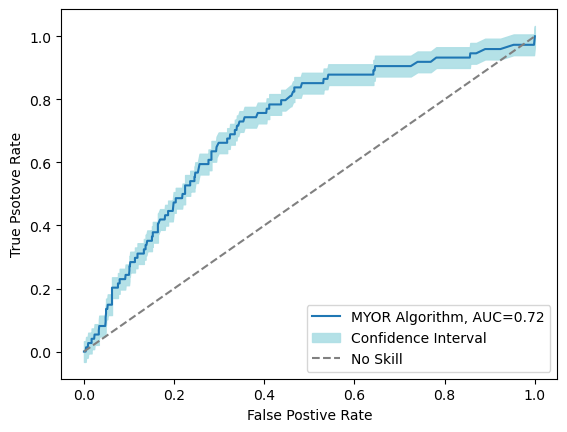

In [1156]:
# AUC

fpr, tpr, _= metrics.roc_curve(y, meta.predict(X))
auc = metrics.roc_auc_score(y, meta.predict(X))

ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))

fig, ax = plt.subplots()
ax.plot (fpr, tpr)
ax.fill_between(fpr, (tpr-ci), (tpr+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--', color="grey")
#ax.legend(["MYOR Algorithm, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"])
plt.legend(["MYOR Algorithm, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"], loc=4)


plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')
plt.show()


In [976]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    prob = meta.predict(X)
    report = classification_report(y, labels, output_dict=True)
    precision_value = report['1']['precision']
    recall_value = report['1']['recall']
    accuracy_value = report['accuracy']
    F1_score = report['1']['f1-score']
    fpr, tpr, thresholds = roc_curve(y, prob, pos_label=1)
    auc_score = roc_auc_score(y, meta.predict(X))
    ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))
    cm = confusion_matrix(y, labels)
    scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
    result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])
result

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
- prec_sibling
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
- prec_sibling
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature na

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.102041,0.810811,0.522467,0.181269,0.70234,0.03094
1,0.15,0.114650,0.729730,0.614978,0.198165,0.70234,0.03094
2,0.20,0.130435,0.648649,0.695154,0.217195,0.70234,0.03094
3,0.25,0.140845,0.540541,0.755066,0.223464,0.70234,0.03094
4,0.30,0.119835,0.391892,0.772687,0.183544,0.70234,0.03094
5,0.40,0.117318,0.283784,0.814097,0.166008,0.70234,0.03094
6,0.50,0.114504,0.202703,0.845815,0.146341,0.70234,0.03094


In [893]:
df_pred2.FA_6y.value_counts(normalize=True)

0    0.934802
1    0.065198
Name: FA_6y, dtype: float64

In [894]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    cm = confusion_matrix(y, labels)
    FP = cm[0][1]
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    scores.append([n,FP,TN,TP,FN])
    result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.

,TH,FP,TN,TP,FN
0,0.10,563,498,63,11
1,0.15,403,658,55,19
2,0.20,308,753,47,27
3,0.25,242,819,39,35
4,0.30,201,860,33,41
5,0.40,150,911,26,48
6,0.50,86,975,18,56


In [ ]:
# To do:

# AUC graph :
# full (+antib) , model wo antib, validation (ifps), standard of care *2 (ifps: parental FA, infant AD)

### Standard of care


Compare full algorithm results to parental FA and infant AD

In [1045]:
df_pred2

,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA,Y6origmiq,FA_6y,Autumn,Spring,Summer,Winter,Parental_atopic,sibling_FA,Sibling_atopic_sum,prec_sibling,Parent atopic condition,Sibling FA,FA_diganosis_6
0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0,390,0,0,0,0,1,2.0,1,4.0,1.0,2.0,1.0,0
1,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0,1445,1,0,0,0,1,4.0,0,0.0,0.0,4.0,1.0,1
2,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0,2447,0,0,0,1,0,3.0,0,0.0,0.0,3.0,0.0,0
3,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2866,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
4,b'00012331',1,2.0,0,0.0,0.0,1.0,0.0,1,1,0,0,0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,1.0,1,0,12331,0,0,0,1,0,2.0,1,1.0,1.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,b'02701233',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2701233,0,0,0,0,1,2.0,0,0.0,0.0,2.0,0.0,0
1131,b'02703742',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,0,0,2703742,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1132,b'02715662',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0.0,1.0,Winter,0.0,1,0,2715662,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1133,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Spring,0.0,1,0,2744682,0,0,1,0,0,0.0,0,1.0,1.0,0.0,0.0,0


In [1072]:

# Parental_FA
X1 = df_pred2[['Parental_FA']]
y1 = df_pred2['FA_6y']

# Infant AD
X2 = df_pred2[['Infant Atopic Dermatitis']]
y2 = df_pred2['FA_6y']


In [1132]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size=0.3)

In [1133]:
print (y1_train.value_counts(normalize=True))
print (y1_test.value_counts(normalize=True))

print (y2_train.value_counts(normalize=True))
print (y2_test.value_counts(normalize=True))

0    0.928212
1    0.071788
Name: FA_6y, dtype: float64
0    0.950147
1    0.049853
Name: FA_6y, dtype: float64
0    0.93073
1    0.06927
Name: FA_6y, dtype: float64
0    0.944282
1    0.055718
Name: FA_6y, dtype: float64


In [1134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

rf1 = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=10, random_state=35)
#tr = DecisionTreeClassifier()

rf1.fit(X1_train, y1_train)
y_pred1 = (rf1.predict(X1_test)>0.1).astype('float')
#y_pred1 = tr.predict(X1_test)


#model result
cnf_matrix = confusion_matrix(y1_test, y_pred1)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred1))
print("Precision:",metrics.precision_score(y1_test, y_pred1))
print("Recall:",metrics.recall_score(y1_test, y_pred1))
print ("roc_auc_score:",roc_auc_score(y1_test, y_pred1))

[[286  38]
 [ 13   4]]
Accuracy: 0.8504398826979472
Precision: 0.09523809523809523
Recall: 0.23529411764705882
roc_auc_score: 0.5590050835148874


In [1135]:
rf2 = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=10, random_state=35)

rf2.fit(X2_train, y2_train)
y_pred2 = (rf2.predict(X2_test)>0.1).astype('float')

#model result
cnf_matrix = confusion_matrix(y2_test, y_pred2)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y2_test, y_pred2))
print("Precision:",metrics.precision_score(y2_test, y_pred2))
print("Recall:",metrics.recall_score(y2_test, y_pred2))
print ("roc_auc_score:",roc_auc_score(y2_test, rf2.predict(X2_test)))


[[245  77]
 [ 11   8]]
Accuracy: 0.7419354838709677
Precision: 0.09411764705882353
Recall: 0.42105263157894735
roc_auc_score: 0.5909610983981693


In [1094]:
thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
scores = []

for n in thresholds:
    labels = rf.predict(X2_test) >= n
    prob = rf.predict(X2_test)
    report = classification_report(y2_test, labels, output_dict=True)
    precision_value = report['1']['precision']
    recall_value = report['1']['recall']
    accuracy_value = report['accuracy']
    F1_score = report['1']['f1-score']
    fpr, tpr, thresholds = roc_curve(y2_test, prob, pos_label=1)
    auc_score = roc_auc_score(y2_test, rf.predict(X2_test))
    ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))
    cm = confusion_matrix(y2_test, labels)
    scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
    result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])
result

c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.10,0.162791,0.466667,0.741935,0.241379,0.617578,0.462319
1,0.15,0.000000,0.000000,0.912023,0.000000,0.617578,0.462319
2,0.20,0.000000,0.000000,0.912023,0.000000,0.617578,0.462319
3,0.25,0.000000,0.000000,0.912023,0.000000,0.617578,0.462319
4,0.30,0.000000,0.000000,0.912023,0.000000,0.617578,0.462319
5,0.40,0.000000,0.000000,0.912023,0.000000,0.617578,0.462319
6,0.50,0.000000,0.000000,0.912023,0.000000,0.617578,0.462319


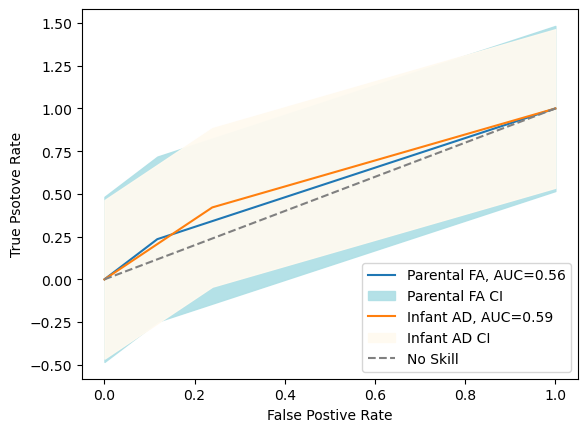

In [1142]:
# AUC

fpr1, tpr1, _= metrics.roc_curve(y1_test, rf1.predict(X1_test))
auc1 = metrics.roc_auc_score(y1_test, rf1.predict(X1_test))
ci1 = 1.96*np.std(tpr1)/np.sqrt(len(fpr1))

plt.plot(fpr1, tpr1, label="Parental FA, AUC="+str(round(auc1,2)))


#fig, ax = plt.subplots()
#ax.plot (fpr1, tpr1)
#ax.fill_between(fpr, (tpr1-ci1), (tpr1+ci1), color='yellow', alpha=.95)
plt.fill_between(fpr1, (tpr1-ci1), (tpr1+ci1), color='powderblue', alpha=.95, label="Parental FA CI")



fpr2, tpr2, _= metrics.roc_curve(y2_test, rf2.predict(X2_test))
auc2 = metrics.roc_auc_score(y2_test, rf2.predict(X2_test))
ci2 = 1.96*np.std(tpr2)/np.sqrt(len(fpr2))

plt.plot(fpr2, tpr2, label="Infant AD, AUC="+str(round(auc2,2)))


#fig, ax = plt.subplots()
#ax.plot (fpr2, tpr2)
#ax.fill_between(fpr2, (tpr2-ci2), (tpr2+ci2), color='powderblue', alpha=.95)
plt.fill_between(fpr2, (tpr2-ci2), (tpr2+ci2), color='floralwhite', alpha=.95, label="Infant AD CI")



plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")
#ax.legend(["Parental FA, AUC="+str(round(auc1,2)), "Infant AD, AUC="+str(round(auc2,2)),"Confidence Interval","No Skill"])

plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()


In [1180]:
print(ci1)
print(ci2)

0.4830748622814512
0.46389202849008426


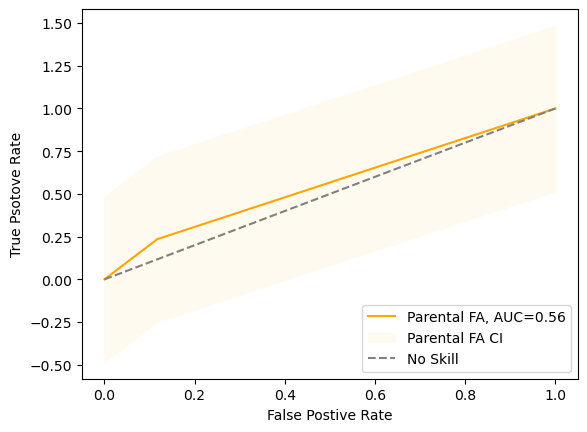

In [1184]:
fpr1, tpr1, _= metrics.roc_curve(y1_test, rf1.predict(X1_test))
auc1 = metrics.roc_auc_score(y1_test, rf1.predict(X1_test))
ci1 = 1.96*np.std(tpr1)/np.sqrt(len(fpr1))

plt.plot(fpr1, tpr1, label="Parental FA, AUC="+str(round(auc1,2)), color="orange")

plt.fill_between(fpr1, (tpr1-ci1), (tpr1+ci1), color='floralwhite', alpha=.95, label="Parental FA CI")

plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")

plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()

c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Parent atopic condition
- Sibling FA
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Sibling Food Allergies

  warnings.warn(message, FutureWarning)


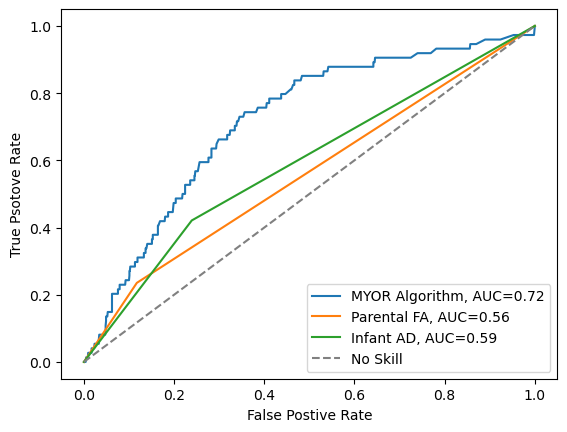

In [1157]:
# All 3 lines together:

fpr, tpr, _= metrics.roc_curve(y, meta.predict(X))
auc = metrics.roc_auc_score(y, meta.predict(X))
plt.plot(fpr, tpr, label="MYOR Algorithm, AUC="+str(round(auc,2)))


fpr1, tpr1, _= metrics.roc_curve(y1_test, rf1.predict(X1_test))
auc1 = metrics.roc_auc_score(y1_test, rf1.predict(X1_test))

plt.plot(fpr1, tpr1, label="Parental FA, AUC="+str(round(auc1,2)))


fpr2, tpr2, _= metrics.roc_curve(y2_test, rf2.predict(X2_test))
auc2 = metrics.roc_auc_score(y2_test, rf2.predict(X2_test))

plt.plot(fpr2, tpr2, label="Infant AD, AUC="+str(round(auc2,2)))


plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")
#ax.legend(["Parental FA, AUC="+str(round(auc1,2)), "Infant AD, AUC="+str(round(auc2,2)),"Confidence Interval","No Skill"])

plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()



In [1175]:
df_pred2.to_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_pred.csv')

In [1179]:
df.to_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_full_pred.csv')

## Standard of care - Parents atopic condition, Infant AD

In [3]:
## Add to standard of care: Family history of atopic conditoin: Yes/No atopic diseas of at least one of the parents
## df_6y['Maternal_atopic'] or df_6y['Paternal_atopic'] then 1

In [602]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_pred.csv')

In [322]:
df

,Unnamed: 0,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA,Y6origmiq,FA_6y,Autumn,Spring,Summer,Winter,Parental_atopic,sibling_FA,Sibling_atopic_sum,prec_sibling,Parent atopic condition,Sibling FA,FA_diganosis_6
0,0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0,390,0,0,0,0,1,2.0,1,4.0,1.0,2.0,1.0,0
1,1,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0,1445,1,0,0,0,1,4.0,0,0.0,0.0,4.0,1.0,1
2,2,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0,2447,0,0,0,1,0,3.0,0,0.0,0.0,3.0,0.0,0
3,3,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2866,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
4,4,b'00012331',1,2.0,0,0.0,0.0,1.0,0.0,1,1,0,0,0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,1.0,1,0,12331,0,0,0,1,0,2.0,1,1.0,1.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1130,b'02701233',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2701233,0,0,0,0,1,2.0,0,0.0,0.0,2.0,0.0,0
1131,1131,b'02703742',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,0,0,2703742,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1132,1132,b'02715662',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0.0,1.0,Winter,0.0,1,0,2715662,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1133,1133,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Spring,0.0,1,0,2744682,0,0,1,0,0,0.0,0,1.0,1.0,0.0,0.0,0


In [603]:
df['Parent atopic condition'].value_counts()

0.0    460
1.0    298
2.0    213
3.0     99
4.0     42
5.0     19
7.0      3
6.0      1
Name: Parent atopic condition, dtype: int64

In [604]:
df['Atopic Parent'] = np.where(df['Parent atopic condition']>0,1,0)
df['Atopic Parent'].value_counts()

1    675
0    460
Name: Atopic Parent, dtype: int64

In [605]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [606]:
import pickle

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_6YO_no_ses.sav', 'rb')
meta = pickle.load(file)

In [607]:
feature_cols = ['Gender', 'Urban', 
                     'Parent atopic condition', 
                     'First Born', 
                      'Sibling FA', #'Sibling Food Allergies', 
                      'prec_sibling', #Percent of Siblings with Atopic',
                     'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
                     #'Season of birth: Autumn','Season of birth: Summer', 'Season of birth: Winter']
                     'Autumn','Summer', 'Winter']
X = df[feature_cols] # Features
#y = df_pred['FA_diganosis_5']
y = df['FA_6y']

y_pred = (meta.predict(X) >= 0.19513).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))



[[763 298]
 [ 28  46]]
Accuracy: 0.7127753303964758
Precision: 0.13372093023255813
Recall: 0.6216216216216216
roc_auc_score: 0.7281121838143516


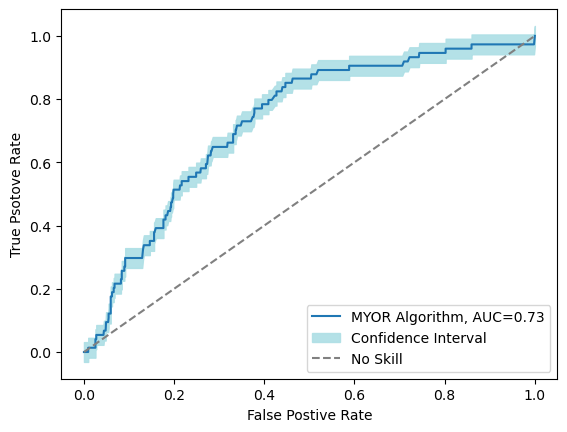

In [115]:
# AUC

fpr, tpr, _= metrics.roc_curve(y, meta.predict(X))
auc = metrics.roc_auc_score(y, meta.predict(X))

ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))

fig, ax = plt.subplots()
ax.plot (fpr, tpr)
ax.fill_between(fpr, (tpr-ci), (tpr+ci), color='powderblue', alpha=.95)
ax.plot([0,1], [0,1], linestyle='--', color="grey")
#ax.legend(["MYOR Algorithm, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"])
plt.legend(["MYOR Algorithm, AUC="+str(round(auc,2)),"Confidence Interval","No Skill"], loc=4)


plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')
plt.show()


### Methods for AUC bootstrapping and CV

In [382]:
# LOOCV #

from sklearn.model_selection import LeaveOneOut

X = df[feature_cols] # Features
y = df['FA_6y']

# Initialize classifier
classifier = meta
# Initialize LeaveOneOut cross-validator
loo = LeaveOneOut()

# List to store AUC scores
auc_scores = []

# Perform LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    classifier.fit(X_train, y_train)
    
    # Predict probabilities for the positive class
    y_prob = classifier.predict(X_test)
    
    # Compute AUC
    auc_score = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc_score)

# Calculate the average AUC
average_auc = np.mean(auc_scores)

print(f'Average AUC with LOOCV: {average_auc}')

KeyError: "None of [Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,\n            ...\n            1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134],\n           dtype='int64', length=1134)] are in the [columns]"

In [384]:
from sklearn.utils import resample


# Initialize classifier

# Number of bootstrap samples
n_iterations = 1000

# Store bootstrap results
bootstrap_auc_scores = []

# Bootstrapping
for i in range(n_iterations):
    # Create a bootstrap sample
    X_sample, y_sample = resample(X, y, replace=True)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2)
    
    # Fit the model and predict probabilities
    meta.fit(X_train, y_train)
    y_prob = meta.predict(X_test)
    
    # Calculate and store the AUC
    auc_score = roc_auc_score(y_test, y_prob)
    bootstrap_auc_scores.append(auc_score)

# Calculating mean and confidence interval
mean_auc = np.mean(bootstrap_auc_scores)
confidence_interval = np.percentile(bootstrap_auc_scores, [2.5, 97.5])

print(f'Mean AUC: {mean_auc}')
print(f'95% Confidence Interval: {confidence_interval}')

Mean AUC: 0.8419413018773313
95% Confidence Interval: [0.68598107 0.97179689]


In [390]:

sorted_scores = np.array(confidence_interval)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.2f} , {:0.2}]".format(
    confidence_lower, confidence_upper))    

Confidence interval for the score: [0.69 , 0.97]


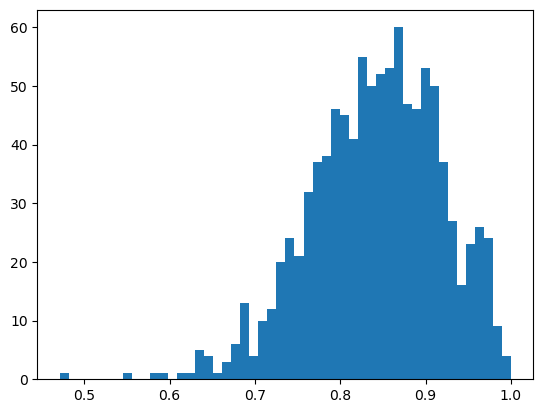

In [388]:
plt.hist(bootstrap_auc_scores, bins=50)
plt.show()


#bootstrap_auc_scores


In [403]:
# Leave one out CV CI for AUC
from sklearn.utils import resample

X = df[feature_cols] # Features
y = df['FA_6y']

def bootstraps(X, y):
    while True:
        yield resample(X, y)
        
        
def estimate_optimism(model, X, y, nboot=100):
    # Step 1 from Ewout's book
    #model.fit(X, y)
    #ypred = model.predict(X)
    #original_performance = roc_auc_score(y, ypred)
    
    bootstrap = bootstraps(X, y)
    auc_train = np.zeros(nboot)
    auc_test = np.zeros(nboot)
    
    #Step 6
    for i in range(nboot):
        # Step 2
        Xstar, ystar = next(bootstrap)
        # Step 3
        #model.fit(Xstar, ystar)
        ypred = model.predict(Xstar)
        auc_train[i] = roc_auc_score(ystar, ypred)
        #Step 4
        #ypred = model.predict(X)
        #auc_test[i] = roc_auc_score(y, ypred)
    
    #Step 5
    #average_optimism = (auc_train - auc_test).mean()
    
    #Step 7
    return auc_train.mean()#original_performance - average_optimism
    

model = meta #RandomForestClassifier(max_depth=3, n_estimators=10)

# Optimism corrected estimate
estimate_optimism(model, X, y)

# Bootstrap the optimism correction process
bootstrap = bootstraps(X, y)
nboot = 100
estimates = np.zeros(nboot)

for i in range(nboot):
    # we are bootstrapping 100x and then repeating the estimate_optimism 100x each for 100^2 runs. 
    # This takes time
    Xnew, ynew = next(bootstrap)
    estimates[i] = estimate_optimism(model, Xnew, ynew)

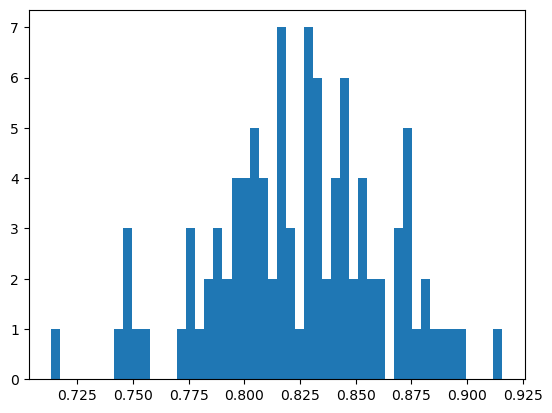

In [404]:

plt.hist(estimates, bins=50)
plt.show()


In [405]:
sorted_scores = np.array(estimates)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.2f} , {:0.2}]".format(
    confidence_lower, confidence_upper))   
print (round(np.mean(estimates),2))    

Confidence interval for the score: [0.75 , 0.89]
0.82


In [378]:
# Bootstrap the optimism correction process (repeated CV)

from sklearn.model_selection import cross_val_score, RepeatedKFold

bootstrap = bootstraps(X, y)
nboot = 100
estimates = np.zeros(nboot)

for i in range(nboot): 
    Xnew, ynew = next(bootstrap)
    estimates[i] = cross_val_score(model, Xnew, ynew, cv = RepeatedKFold(n_splits=5, n_repeats=10), scoring = 'roc_auc').mean()


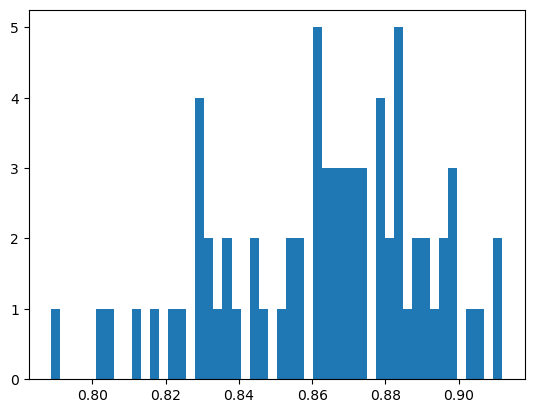

In [377]:
plt.hist(estimates, bins=50)
plt.show()

In [410]:
# Bootsrap CI computation

from scipy.stats import sem
from sklearn.metrics import roc_auc_score


y_true = df['FA_6y']
y_pred = meta.predict(X)

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
        continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.728
Bootstrap #1 ROC area: 0.749
Bootstrap #2 ROC area: 0.676
Bootstrap #3 ROC area: 0.729
Bootstrap #4 ROC area: 0.675
Bootstrap #5 ROC area: 0.701
Bootstrap #6 ROC area: 0.755
Bootstrap #7 ROC area: 0.793
Bootstrap #8 ROC area: 0.730
Bootstrap #9 ROC area: 0.705
Bootstrap #10 ROC area: 0.707
Bootstrap #11 ROC area: 0.760
Bootstrap #12 ROC area: 0.736
Bootstrap #13 ROC area: 0.739
Bootstrap #14 ROC area: 0.729
Bootstrap #15 ROC area: 0.716
Bootstrap #16 ROC area: 0.743
Bootstrap #17 ROC area: 0.688
Bootstrap #18 ROC area: 0.745
Bootstrap #19 ROC area: 0.754
Bootstrap #20 ROC area: 0.785
Bootstrap #21 ROC area: 0.730
Bootstrap #22 ROC area: 0.776
Bootstrap #23 ROC area: 0.692
Bootstrap #24 ROC area: 0.737
Bootstrap #25 ROC area: 0.746
Bootstrap #26 ROC area: 0.701
Bootstrap #27 ROC area: 0.677
Bootstrap #28 ROC area: 0.732
Bootstrap #29 ROC area: 0.761
Bootstrap #30 ROC area: 0.692
Bootstrap #31 ROC area: 0.743
Bootstrap #32 ROC area: 0.790
Bootstrap #33 ROC area: 

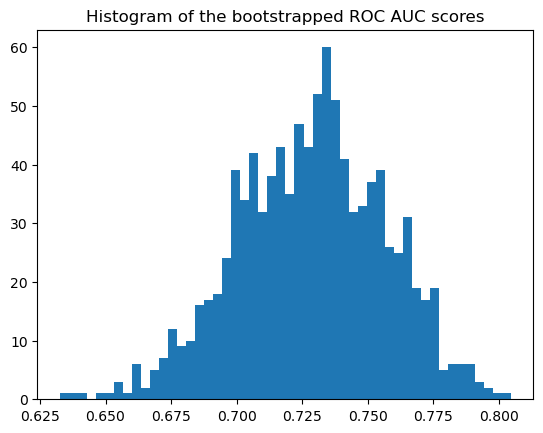

In [411]:
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [415]:
auc_val_on_4 = bootstrapped_scores

In [412]:
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

sorted_scores = np.array(bootstrapped_scores)
sorted_scores.sort()

# Computing the lower and upper bound of the 90% confidence interval
# You can change the bounds percentiles to 0.025 and 0.975 to get
# a 95% confidence interval instead.
confidence_lower = sorted_scores[int(0.05 * len(sorted_scores))]
confidence_upper = sorted_scores[int(0.95 * len(sorted_scores))]
print("Confidence interval for the score: [{:0.3f} , {:0.3}]".format(
    confidence_lower, confidence_upper))

Confidence interval for the score: [0.681 , 0.773]


In [413]:
# Simple CI lower, upper comupetation

from sklearn.metrics import roc_auc_score
from math import sqrt

def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (round(lower,2), round(upper,2))

In [414]:
roc_auc_ci(y, meta.predict(X), positive=1)

(0.66, 0.8)

In [336]:
#thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#thresholds = [0.1,0.11,0.12,0.13,0.14,0.15]
thresholds = [0.195,0.2,0.22,0.24,0.26,0.28,0.3,0.32]

scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    prob = meta.predict(X)
    report = classification_report(y, labels, output_dict=True)
    precision_value = report['1']['precision']
    recall_value = report['1']['recall']
    accuracy_value = report['accuracy']
    F1_score = report['1']['f1-score']
    fpr, tpr, thresholds = roc_curve(y, prob, pos_label=1)
    auc_score = roc_auc_score(y, meta.predict(X))
    ci = 1.96*np.std(tpr)/np.sqrt(len(fpr))
    cm = confusion_matrix(y, labels)
    scores.append([n,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci])
    result = pd.DataFrame(scores, columns=['TH','precision_value','recall_value','accuracy_value','F1_score','auc_score','ci'])
result

,TH,precision_value,recall_value,accuracy_value,F1_score,auc_score,ci
0,0.195,0.135838,0.635135,0.712775,0.223810,0.728112,0.031339
1,0.200,0.134897,0.621622,0.715419,0.221687,0.728112,0.031339
2,0.220,0.137584,0.554054,0.744493,0.220430,0.728112,0.031339
3,0.240,0.143369,0.540541,0.759471,0.226629,0.728112,0.031339
4,0.260,0.147059,0.540541,0.765639,0.231214,0.728112,0.031339
5,0.280,0.140426,0.445946,0.785903,0.213592,0.728112,0.031339
6,0.300,0.138249,0.405405,0.796476,0.206186,0.728112,0.031339
7,0.320,0.138095,0.391892,0.800881,0.204225,0.728112,0.031339


In [337]:
#thresholds = [0.1,0.15,0.2,0.25,0.3,0.4,0.5]
#thresholds = [0.1,0.11,0.12,0.13,0.14,0.15]
#thresholds = [0.2,0.22,0.24,0.26,0.28,0.3]
thresholds = [0.195,0.2,0.22,0.24,0.26,0.28,0.3,0.32]



scores = []

for n in thresholds:
    labels = meta.predict(X) >= n
    cm = confusion_matrix(y, labels)
    FP = cm[0][1]
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    scores.append([n,FP,TN,TP,FN])
    result = pd.DataFrame(scores, columns=['TH','FP','TN','TP','FN'])
result

,TH,FP,TN,TP,FN
0,0.195,299,762,47,27
1,0.200,295,766,46,28
2,0.220,257,804,41,33
3,0.240,239,822,40,34
4,0.260,232,829,40,34
5,0.280,202,859,33,41
6,0.300,187,874,30,44
7,0.320,181,880,29,45


### Standad of care - 6Y

In [470]:
# Parental_FA
X1 = df[['Atopic Parent']]
y1 = df['FA_6y']

# Infant AD
X2 = df[['Infant Atopic Dermatitis']]
y2 = df['FA_6y']

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split (X2, y2, test_size=0.3)

In [471]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

rf1 = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=10, random_state=35)

rf1.fit(X1, y1)

rf2 = RandomForestRegressor(n_estimators=15, max_features='sqrt', max_depth=10, random_state=35)

rf2.fit(X2, y2)


print ("AUC_Atopic_parent:",roc_auc_score(y1_test, rf1.predict(X1_test)))
print ("AUC_Infant_AD:",roc_auc_score(y2_test, rf2.predict(X2_test)))


AUC_Atopic_parent: 0.5462616822429907
AUC_Infant_AD: 0.6237538940809969


In [472]:
y_pred1 = rf1.predict(X1_test)
print(roc_auc_ci(y1_test, y_pred1, positive=1))

y_pred2 = rf2.predict(X2_test)
print(roc_auc_ci(y2_test, y_pred2, positive=1))

y_pred = meta.predict(X)
print(roc_auc_ci(y, y_pred, positive=1))

(0.41, 0.68)
(0.49, 0.76)
(0.66, 0.8)


In [479]:
y1_test

549     0
1076    0
891     0
529     0
301     0
       ..
776     0
408     0
43      0
604     0
1094    1
Name: FA_6y, Length: 341, dtype: int64

In [480]:
# Bootsrap CI computation

from scipy.stats import sem
from sklearn.metrics import roc_auc_score

ytest = y1_test
ytest_len = len(ytest)
indices = range(ytest_len)
ytest.index = indices

y_true = ytest
y_pred = y_pred1

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    #if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
    #    continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.546
Bootstrap #1 ROC area: 0.543
Bootstrap #2 ROC area: 0.520
Bootstrap #3 ROC area: 0.563
Bootstrap #4 ROC area: 0.538
Bootstrap #5 ROC area: 0.571
Bootstrap #6 ROC area: 0.627
Bootstrap #7 ROC area: 0.506
Bootstrap #8 ROC area: 0.607
Bootstrap #9 ROC area: 0.512
Bootstrap #10 ROC area: 0.518
Bootstrap #11 ROC area: 0.566
Bootstrap #12 ROC area: 0.702
Bootstrap #13 ROC area: 0.599
Bootstrap #14 ROC area: 0.516
Bootstrap #15 ROC area: 0.601
Bootstrap #16 ROC area: 0.588
Bootstrap #17 ROC area: 0.548
Bootstrap #18 ROC area: 0.442
Bootstrap #19 ROC area: 0.586
Bootstrap #20 ROC area: 0.636
Bootstrap #21 ROC area: 0.618
Bootstrap #22 ROC area: 0.473
Bootstrap #23 ROC area: 0.488
Bootstrap #24 ROC area: 0.564
Bootstrap #25 ROC area: 0.587
Bootstrap #26 ROC area: 0.615
Bootstrap #27 ROC area: 0.598
Bootstrap #28 ROC area: 0.502
Bootstrap #29 ROC area: 0.621
Bootstrap #30 ROC area: 0.527
Bootstrap #31 ROC area: 0.566
Bootstrap #32 ROC area: 0.655
Bootstrap #33 ROC area: 

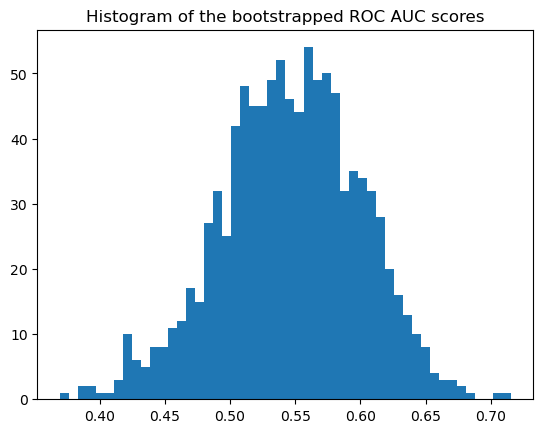

In [481]:
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

In [482]:
auc_Atopic_parent = bootstrapped_scores

In [483]:
# Bootsrap CI computation

from scipy.stats import sem
from sklearn.metrics import roc_auc_score

ytest = y2_test
ytest_len = len(ytest)
indices = range(ytest_len)
ytest.index = indices

y_true = ytest
y_pred = y_pred2

print("Original ROC area: {:0.3f}".format(roc_auc_score(y_true, y_pred)))

n_bootstraps = 1000
rng_seed = 42  # control reproducibility
bootstrapped_scores = []

rng = np.random.RandomState(rng_seed)
for i in range(n_bootstraps):
    # bootstrap by sampling with replacement on the prediction indices
    indices = rng.randint(0, len(y_pred), len(y_pred))
    #if len(np.unique(y_true[indices])) < 2:
        # We need at least one positive and one negative sample for ROC AUC
        # to be defined: reject the sample
    #    continue

    score = roc_auc_score(y_true[indices], y_pred[indices])
    bootstrapped_scores.append(score)
    print("Bootstrap #{} ROC area: {:0.3f}".format(i + 1, score))

Original ROC area: 0.624
Bootstrap #1 ROC area: 0.642
Bootstrap #2 ROC area: 0.607
Bootstrap #3 ROC area: 0.635
Bootstrap #4 ROC area: 0.617
Bootstrap #5 ROC area: 0.600
Bootstrap #6 ROC area: 0.641
Bootstrap #7 ROC area: 0.616
Bootstrap #8 ROC area: 0.605
Bootstrap #9 ROC area: 0.673
Bootstrap #10 ROC area: 0.632
Bootstrap #11 ROC area: 0.602
Bootstrap #12 ROC area: 0.624
Bootstrap #13 ROC area: 0.712
Bootstrap #14 ROC area: 0.621
Bootstrap #15 ROC area: 0.664
Bootstrap #16 ROC area: 0.578
Bootstrap #17 ROC area: 0.738
Bootstrap #18 ROC area: 0.635
Bootstrap #19 ROC area: 0.634
Bootstrap #20 ROC area: 0.621
Bootstrap #21 ROC area: 0.566
Bootstrap #22 ROC area: 0.597
Bootstrap #23 ROC area: 0.664
Bootstrap #24 ROC area: 0.706
Bootstrap #25 ROC area: 0.661
Bootstrap #26 ROC area: 0.563
Bootstrap #27 ROC area: 0.691
Bootstrap #28 ROC area: 0.618
Bootstrap #29 ROC area: 0.475
Bootstrap #30 ROC area: 0.529
Bootstrap #31 ROC area: 0.630
Bootstrap #32 ROC area: 0.696
Bootstrap #33 ROC area: 

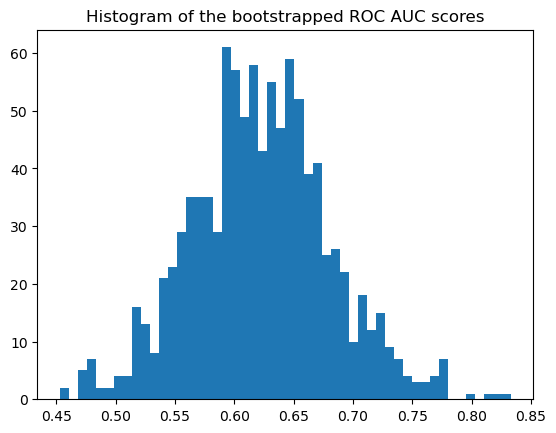

In [490]:
plt.hist(bootstrapped_scores, bins=50)
plt.title('Histogram of the bootstrapped ROC AUC scores')
plt.show()

<AxesSubplot:>

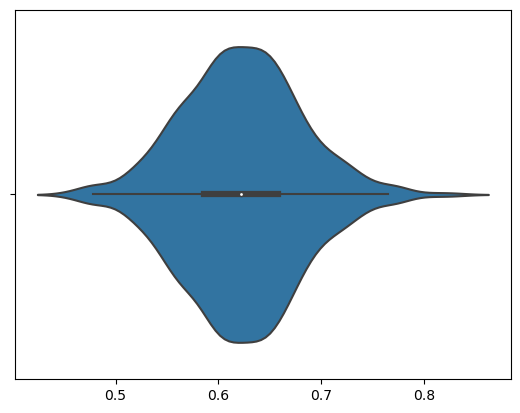

In [491]:
sns.violinplot(bootstrapped_scores)

In [484]:
auc_InfantAD = bootstrapped_scores

In [485]:
auc_df = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\auc_bootstrap.csv')


In [488]:
auc_df.loc[:,'ParentalAtopic_val'] = auc_Atopic_parent
auc_df.loc[:,'InfantAD_val'] = auc_InfantAD
auc_df

,Unnamed: 0,FULL,No SES,No prg,Parental Atopic,Infant AD,1Y FULL,1Y NoPrg,ParentalAtopic_val,InfantAD_val
0,0,0.883021,0.857052,0.798879,0.582837,0.543335,0.820972,0.784117,0.542979,0.642063
1,1,0.889139,0.871244,0.806550,0.581551,0.539664,0.837441,0.786829,0.520450,0.606698
2,2,0.880016,0.866958,0.805268,0.587479,0.543761,0.812804,0.770310,0.563474,0.634657
3,3,0.875337,0.847827,0.790466,0.586005,0.543870,0.823017,0.779654,0.537571,0.617359
4,4,0.873368,0.852948,0.800525,0.589405,0.547249,0.833978,0.780276,0.570533,0.599501
...,...,...,...,...,...,...,...,...,...,...
995,995,0.883655,0.867347,0.803682,0.576331,0.548805,0.832007,0.772085,0.536505,0.709657
996,996,0.873648,0.859129,0.791837,0.572546,0.535133,0.831352,0.780943,0.508412,0.548608
997,997,0.880079,0.874867,0.812770,0.576686,0.546758,0.831956,0.786666,0.525078,0.621603
998,998,0.879675,0.863927,0.802757,0.588157,0.541389,0.835315,0.767302,0.555580,0.653670


<AxesSubplot:>

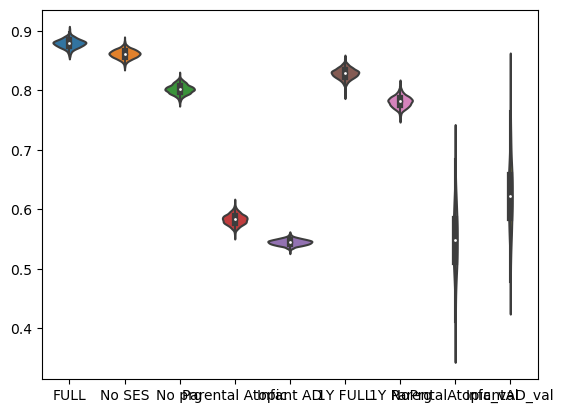

In [499]:
auc_df = auc_df.drop('Unnamed: 0', axis=1)
sns.violinplot(data=auc_df)

<AxesSubplot:>

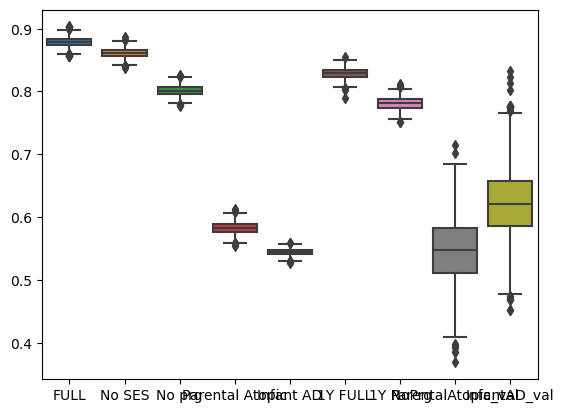

In [500]:
sns.boxplot(data=auc_df)

In [489]:
#auc_df.to_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\auc_bootstrap.csv')

In [111]:
y_pred1 = rf1.predict(X1_test)>=0.15
y_pred2 = rf2.predict(X2_test)>=0.15

cnf_matrix1 = confusion_matrix(y1_test,y_pred1)
print(cnf_matrix1)

cnf_matrix2 = confusion_matrix(y2_test,y_pred2)
print(cnf_matrix2)

[[317   0]
 [ 24   0]]
[[325   0]
 [ 16   0]]


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
- Parent atopic condition
- Sibling FA
- Summer
- Winter
- ...
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Season of birth: Autumn
- Season of birth: Summer
- Season of birth: Winter
- ...

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
- Parent atopic condition
- Sibling FA
- Summer
- Winter
- ...
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Season of birth: Autumn
- Season of birth: Summer
- Season of

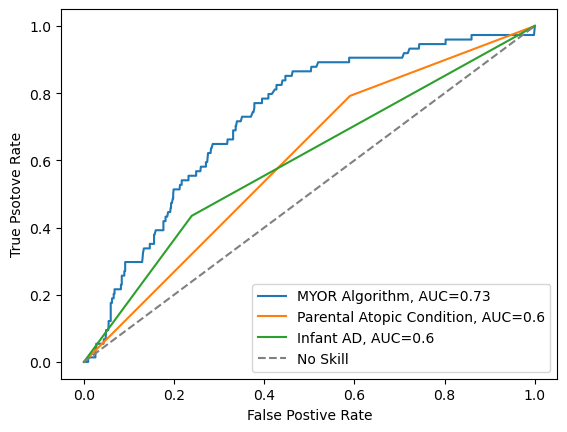

In [50]:
# All 3 lines together:

fpr, tpr, _= metrics.roc_curve(y, meta.predict(X))
auc = metrics.roc_auc_score(y, meta.predict(X))
plt.plot(fpr, tpr, label="MYOR Algorithm, AUC="+str(round(auc,2)))


fpr1, tpr1, _= metrics.roc_curve(y1_test, rf1.predict(X1_test))
auc1 = metrics.roc_auc_score(y1_test, rf1.predict(X1_test))

plt.plot(fpr1, tpr1, label="Parental Atopic Condition, AUC="+str(round(auc1,2)))


fpr2, tpr2, _= metrics.roc_curve(y2_test, rf2.predict(X2_test))
auc2 = metrics.roc_auc_score(y2_test, rf2.predict(X2_test))

plt.plot(fpr2, tpr2, label="Infant AD, AUC="+str(round(auc2,2)))


plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")
#ax.legend(["Parental FA, AUC="+str(round(auc1,2)), "Infant AD, AUC="+str(round(auc2,2)),"Confidence Interval","No Skill"])

plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()



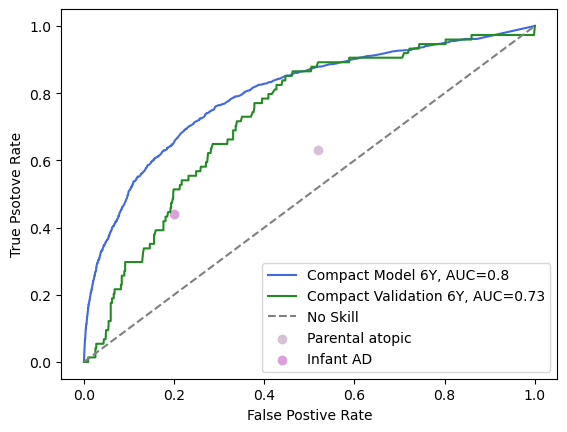

In [612]:
### 2 lines 2 dots: Our algorithm, validation & soc (2 dots) ###

auc_6Yc = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\auc_6c.csv')

y_test = auc_6Yc['6c_y_test']
y_pred = auc_6Yc['6c_y_pred']
fpr, tpr, _= metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="Compact Model 6Y, AUC="+str(round(auc,2)), color="royalblue")


fpr, tpr, _= metrics.roc_curve(y, meta.predict(X))
auc = metrics.roc_auc_score(y, meta.predict(X))
plt.plot(fpr, tpr, label="Compact Validation 6Y, AUC="+str(round(auc,2)), color="forestgreen")


plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")
plt.scatter(0.52,0.63, label="Parental atopic", color="thistle")
plt.scatter(0.2,0.44, label="Infant AD", color="plum")


plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()


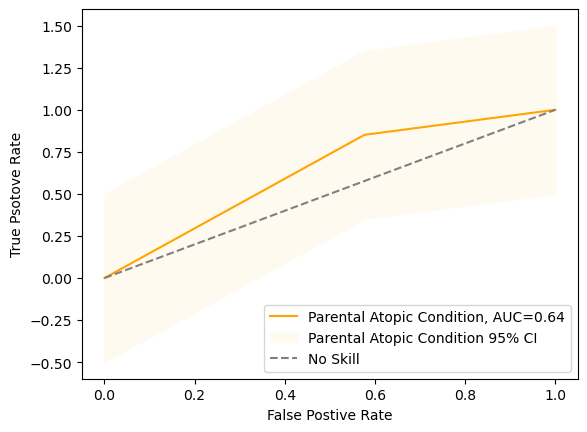

In [57]:
fpr1, tpr1, _= metrics.roc_curve(y1, rf1.predict(X1))
auc1 = metrics.roc_auc_score(y1, rf1.predict(X1))
ci1 = 1.96*np.std(tpr1)/np.sqrt(len(fpr1))

plt.plot(fpr1, tpr1, label="Parental Atopic Condition, AUC="+str(round(auc1,2)), color="orange")

plt.fill_between(fpr1, (tpr1-ci1), (tpr1+ci1), color='floralwhite', alpha=.95, label="Parental Atopic Condition 95% CI")

plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")

plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()

In [118]:
y_pred1 = rf1.predict(X1_test)
print(roc_auc_ci(y1_test, y_pred1, positive=1))

#y_pred2 = rf2.predict(X2_test)
#print(roc_auc_ci(y2_test, y_pred2, positive=1))

fpr1, tpr1, _= metrics.roc_curve(y1_test, y_pred1)
print(fpr1)
print(tpr1)
ci1 = 1.96*np.std(tpr1)/np.sqrt(len(fpr1))
ci1

(0.43, 0.68)
[0.         0.51735016 1.        ]
[0.    0.625 1.   ]


0.46676387876368347

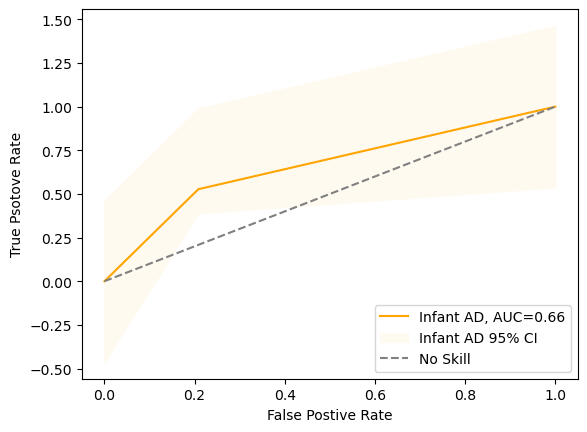

In [59]:
fpr2, tpr2, _= metrics.roc_curve(y2, rf2.predict(X2))
auc2 = metrics.roc_auc_score(y2, rf2.predict(X2))
ci2 = 1.96*np.std(tpr2)/np.sqrt(len(fpr2))

plt.plot(fpr2, tpr2, label="Infant AD, AUC="+str(round(auc2,2)), color="orange")

plt.fill_between(fpr2, (tpr1-ci2), (tpr2+ci2), color='floralwhite', alpha=.95, label="Infant AD 95% CI")

plt.plot([0,1], [0,1], linestyle='--', color="grey", label="No Skill")

plt.xlabel('False Postive Rate')
plt.ylabel('True Psotove Rate')

plt.legend(loc=4)

plt.show()

In [120]:
y_pred2 = rf2.predict(X2_test)
print(roc_auc_ci(y2_test, y_pred2, positive=1))

fpr2, tpr2, _= metrics.roc_curve(y2_test, y_pred2)
print(fpr2)
print(tpr2)
ci2 = 1.96*np.std(tpr2)/np.sqrt(len(fpr2))
ci2

(0.47, 0.77)
[0.         0.20307692 1.        ]
[0.     0.4375 1.    ]


0.4631779315730579

In [70]:
pip install confidenceinterval


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for confidenceinterval: filename=confidenceinterval-1.0.4-py3-none-any.whl size=14957 sha256=4a662c99025426fb151af7108de78708443ecdf39eaa51b0e626673c55cfcd33
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\d6\1d\93\a9c05e7506afcd6e0b125bd15e429a00980a7a7c882c1903af
Successfully built confidenceinterval


In [80]:

from confidenceinterval.bootstrap import bootstrap_ci
from sklearn.metrics import balanced_accuracy_score

# You can specify a random generator for reproducability, or pass None
random_generator = np.random.default_rng()
bootstrap_ci(y_true=y,
             y_pred=y_pred,
             metric=balanced_accuracy_score,
             confidence_level=0.95,
             n_resamples=9999,
             method='bootstrap_bca',
             random_state=random_generator)

TypeError: statistic() got an unexpected keyword argument 'axis'

In [121]:
print(ci1)
print(ci2)

0.46676387876368347
0.4631779315730579


In [82]:

param_ind = [1,1,1]
param_score = [1,1,3]

def max_score (param_ind, param_score) :
    for i in param_ind:
        for j in param_score:
            max_score = sum(i*j)
    return max_score

#print(max_score(param_ind,param_score))

print(list(zip(param_ind, param_score)))
print(list(x*y for x, y in list(zip(param_ind, param_score))))
print(sum(x*y for x, y in list(zip(param_ind, param_score))))

[(1, 1), (1, 1), (1, 3)]
[1, 1, 3]
5


# Race Sub analysis

In [5]:
import pandas as pd

df = pd.read_csv("C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_pred.csv")
df.columns

Index(['Unnamed: 0', 'SAMPMIQ', 'Urban', 'N1', 'Gender',
       'Season of birth: Autumn', 'Season of birth: Spring',
       'Season of birth: Summer', 'Season of birth: Winter', 'Target',
       'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics', 'Smoking',
       'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Parent Atopic Condition',
       '2_compliance', '3_compliance', '4_compliance', '5_compliance',
       '6_compliance', '7_compliance', '9_compliance', 'X_compliance',
       'W_compliance', 'P41_2', 'RACE', 'Season', 'Sibling_atopic', 'siblings',
       'Parental_FA', 'Y6origmiq', 'FA_6y', 'Autumn', 'Spring', 'Summer',
       'Winter', 'Parental_atopic', 'sibling_FA', 'Sibling_atopic_sum',
       'prec_sibling', 'Parent atopic condition', 'Sibling FA',
       'FA_diganosis_6'],
      dtype='object')

In [6]:
# Race: # 1 = White 2 = Black 3 = Asian 4 = other

df.RACE.value_counts()

1.0    995
4.0     48
2.0     36
3.0     33
0.0     23
Name: RACE, dtype: int64

In [7]:
import pickle

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_6YO_no_ses.sav', 'rb')
meta = pickle.load(file)

In [9]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [10]:
feature_cols = ['Gender', 'Urban', 
                     'Parent atopic condition', 
                     'First Born', 
                      'Sibling FA', #'Sibling Food Allergies', 
                      'prec_sibling', #Percent of Siblings with Atopic',
                     'Infant Atopic Dermatitis', 'Infant Systemic Antibiotics',
                     #'Season of birth: Autumn','Season of birth: Summer', 'Season of birth: Winter']
                     'Autumn','Summer', 'Winter']
X = df[feature_cols] # Features
#y = df_pred['FA_diganosis_5']
y = df['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
#print(classification_report(y, y_pred))
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))


[[827 234]
 [ 34  40]]
Accuracy: 0.7638766519823789
Precision: 0.145985401459854
Recall: 0.5405405405405406
roc_auc_score: 0.7281121838143516


c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
- Parent atopic condition
- Sibling FA
- Summer
- Winter
- ...
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Season of birth: Autumn
- Season of birth: Summer
- Season of birth: Winter
- ...

  warnings.warn(message, FutureWarning)
c:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Autumn
- Parent atopic condition
- Sibling FA
- Summer
- Winter
- ...
Feature names seen at fit time, yet now missing:
- Parent Atopic Condition
- Percent of Siblings with Atopic
- Season of birth: Autumn
- Season of birth: Summer
- Season of

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Race: # 1 = White 2 = Black 3 = Asian 4 = other

df1 = df[df['RACE']==1]
df2 = df[df['RACE']==2]
df3 = df[df['RACE']==3]
df4 = df[df['RACE'].isin([0,4])] 

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(995, 45)
(36, 45)
(33, 45)
(71, 45)


In [16]:
# 1 = White

X = df1[feature_cols] # Features
y = df1['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[728 202]
 [ 30  35]]
Accuracy: 0.7668341708542713
Precision: 0.14767932489451477
Recall: 0.5384615384615384
roc_auc_score: 0.7373614557485525


In [17]:
# 2 = Black

X = df2[feature_cols] # Features
y = df2['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[25  9]
 [ 0  2]]
Accuracy: 0.75
Precision: 0.18181818181818182
Recall: 1.0
roc_auc_score: 0.7647058823529411


In [19]:
# 3 = Asian

X = df3[feature_cols] # Features
y = df3['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))


[[23  8]
 [ 0  2]]
Accuracy: 0.7575757575757576
Precision: 0.2
Recall: 1.0
roc_auc_score: 0.7419354838709677


In [26]:
# 4 = Other or unkown

X = df4[feature_cols] # Features
y = df4['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[51 15]
 [ 4  1]]
Accuracy: 0.7323943661971831
Precision: 0.0625
Recall: 0.2
roc_auc_score: 0.546969696969697


In [28]:
print(df1.FA_6y.value_counts(normalize=True))
print(df2.FA_6y.value_counts(normalize=True))
print(df3.FA_6y.value_counts(normalize=True))
print(df4.FA_6y.value_counts(normalize=True))

0    0.934673
1    0.065327
Name: FA_6y, dtype: float64
0    0.944444
1    0.055556
Name: FA_6y, dtype: float64
0    0.939394
1    0.060606
Name: FA_6y, dtype: float64
0    0.929577
1    0.070423
Name: FA_6y, dtype: float64


In [29]:
print(df1.FA_6y.value_counts(normalize=False))
print(df2.FA_6y.value_counts(normalize=False))
print(df3.FA_6y.value_counts(normalize=False))
print(df4.FA_6y.value_counts(normalize=False))

0    930
1     65
Name: FA_6y, dtype: int64
0    34
1     2
Name: FA_6y, dtype: int64
0    31
1     2
Name: FA_6y, dtype: int64
0    66
1     5
Name: FA_6y, dtype: int64


# ALgorithm With SES
(For the paper)

In [232]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\User\\Desktop\\FA\\Validation\\ifps_pred.csv')

In [234]:
df
# Y6origmiq	

,Unnamed: 0,SAMPMIQ,Urban,N1,Gender,Season of birth: Autumn,Season of birth: Spring,Season of birth: Summer,Season of birth: Winter,Target,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Smoking,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Parent Atopic Condition,2_compliance,3_compliance,4_compliance,5_compliance,6_compliance,7_compliance,9_compliance,X_compliance,W_compliance,P41_2,RACE,Season,Sibling_atopic,siblings,Parental_FA,Y6origmiq,FA_6y,Autumn,Spring,Summer,Winter,Parental_atopic,sibling_FA,Sibling_atopic_sum,prec_sibling,Parent atopic condition,Sibling FA,FA_diganosis_6
0,0,b'00000390',0,2.0,0,1.0,0.0,0.0,0.0,0,0,1,1,0,0.0,0.5,2.0,0,0,0,0,0,0,0,0,0,0.0,2.0,Autumn,2.0,4,0,390,0,0,0,0,1,2.0,1,4.0,1.0,2.0,1.0,0
1,1,b'00001445',1,2.0,0,0.0,0.0,0.0,1.0,1,0,0,0,0,1.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0.0,4.0,Winter,1.0,1,0,1445,1,0,0,0,1,4.0,0,0.0,0.0,4.0,1.0,1
2,2,b'00002447',0,1.0,1,0.0,0.0,1.0,0.0,0,0,0,0,1,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,0.0,0,0,2447,0,0,0,1,0,3.0,0,0.0,0.0,3.0,0.0,0
3,3,b'00002866',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2866,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
4,4,b'00012331',1,2.0,0,0.0,0.0,1.0,0.0,1,1,0,0,0,1.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Summer,1.0,1,0,12331,0,0,0,1,0,2.0,1,1.0,1.0,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1130,b'02701233',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,1,0,2701233,0,0,0,0,1,2.0,0,0.0,0.0,2.0,0.0,0
1131,1131,b'02703742',0,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Winter,0.0,0,0,2703742,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1132,1132,b'02715662',1,2.0,0,0.0,0.0,0.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,0.0,1.0,Winter,0.0,1,0,2715662,0,0,0,0,1,0.0,0,1.0,1.0,0.0,0.0,0
1133,1133,b'02744682',1,2.0,0,0.0,1.0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0.0,1.0,Spring,0.0,1,0,2744682,0,0,1,0,0,0.0,0,1.0,1.0,0.0,0.0,0


In [250]:
import pickle

file = open('C:\\Users\\User\\Desktop\\FA\\Algorithms\\FA_6Y_no_prganti.sav', 'rb')
meta = pickle.load(file)

In [252]:
meta.feature_names_in_

array(['Gender', 'Urban', 'Low SES', 'Medium SES', 'High SES', 'Smoking',
       'Parent Atopic Condition', 'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter'], dtype=object)

In [233]:
### SES = Mother's Education

# Read 6Y follow up file:

df_6y = pd.read_sas("C:\\Users\\User\\Downloads\\Y6FU.sas7bdat")  

#df_6y[['Y6educ','Y6income']].value_counts()
df_6y

,Y6origmiq,Y6gend,Y6marital,Y6educ,Y6race,Y6hisp,Y6income,Y6hhsiz,Y6employ,Y6occ,Y6state,y6a1a1,y6a1a2,y6a1a3,y6a1b1,y6a1b2,y6a1b3,y6a1c1,y6a1c2,y6a1c3,y6a1d1,y6a1d2,y6a1d3,y6a1e1,y6a1e2,y6a1e3,y6a1f1,y6a1f2,y6a1f3,y6a2a,y6a2b,y6a2c,Y6a3,y6a4a,y6a4b,Y6a5,Y6a6a,Y6a6b,Y6a6c,Y6a6d,Y6a6e,Y6a6f,Y6a6g,Y6a6h,Y6a7,Y6a8,Y6a9,Y6a10a,Y6a10b,Y6a10c,Y6a10d,Y6a10e,Y6a10f,Y6a10g,Y6a10h,Y6a10i,Y6a10j,Y6a10k,Y6a10l,Y6a10m,Y6a10n,Y6a10o,Y6a10p,Y6a10q,Y6a10r,Y6a10s,Y6a10t,Y6a10u,Y6a10v,Y6a10w,Y6a10x,Y6a10y,Y6b1,Y6b2,Y6b3,Y6b4,Y6b5,Y6b6,Y6b7,Y6b8a,Y6b8b,Y6b9,Y6b10a,Y6b10b,Y6b11,Y6b12,Y6b13,Y6b14a,Y6b14b,Y6b14c,y6b15a,y6b15b,y6b15c,y6b15d,y6b16a,y6b16b,y6b16c,y6b16d,y6b16e,y6b16f,Y6b17,Y6b18,Y6b19,y6b20a,y6b20b,y6b20c,y6b20d,y6b20e,y6b20f,y6b20g,y6b20h,y6b20i,y6b20j,y6b20k,y6b20l,y6b20m,y6b20n,y6b20o,y6b20p,y6b20q,y6b20r,y6b20s,y6b20v,Y6b20mrk,Y6b21a,Y6b21b,Y6b21c,Y6b21d,Y6b21e,Y6b21f,Y6b21g,Y6b21h,Y6b21i,Y6b21j,Y6b22a_a,Y6b22a_b,Y6b22a_c,Y6b22a_d,Y6b22a_e,Y6b22a_f,Y6b22a_g,Y6b22a_h,Y6b22a_i,Y6b22b_a,Y6b22b_b,Y6b22b_c,Y6b22b_d,Y6b22b_e,Y6b22b_f,Y6b22b_g,Y6b22b_h,Y6b22b_i,Y6b22c_a,Y6b22c_b,Y6b22c_c,Y6b22c_d,Y6b22c_e,Y6b22c_f,Y6b22c_g,Y6b22c_h,Y6b22c_i,y6b23a1,y6b23a2,y6b23a3,y6b23b1,y6b23b2,y6b23b3,y6b23c1,y6b23c2,y6b23c3,y6b23d1,y6b23d2,y6b23d3,Y6b24a,Y6b24b,Y6b24c,Y6b24d,Y6b24e,Y6b24f,Y6b24g,Y6b24h,Y6b25a,Y6b25b,Y6b25c,Y6b26a,Y6b26b,Y6b26c,Y6b26d,Y6b26e,Y6b26f,Y6b26g,Y6b26h,Y6b27a,Y6b27b,Y6b27c,Y6b28a,Y6b28b,Y6b28c,Y6b28d,Y6b28e,Y6b28f,Y6b28g,Y6b28h,Y6b28i,Y6b28j,Y6b28k,Y6b28l,Y6b28m,Y6b28n,Y6b28o,Y6b28p,Y6b28q,Y6b28r,Y6b28s,Y6b29a,Y6b29b,Y6b29c,Y6b30,Y6b31,Y6b32a,Y6b32b,Y6b32c,Y6b32d,Y6b32e,Y6b32f,Y6b32g,Y6b32h,Y6b32i,Y6b32j,Y6b32k,Y6b32l,Y6b32m,Y6b32n,Y6b32o,Y6b32p,Y6b33,Y6c1,Y6c2,Y6c3,Y6c4a,Y6c4b,Y6c5,Y6c6,Y6c7,Y6c8,Y6c9,Y6d1a,Y6d1b,Y6d1c,Y6d1d,Y6d1e,Y6d1f,Y6d2a,Y6d2b,Y6d2c,Y6d3,Y6d4,Y6d5,Y6d6,Y6d7a,Y6d7b,Y6d7c,Y6d7d,Y6d7e,Y6d7f,Y6d7g,Y6D8,Y6d9,Y6d10,Y6d11,Y6d12,Y6d13a,Y6d13b,Y6d13c,Y6d13d,Y6d13e,Y6d13f,Y6d13g,Y6d13h,Y6d13i,Y6d13j,Y6d13k,Y6d13l,Y6d13m,Y6d13n,Y6d13o,Y6d13p,Y6d13q,Y6d13r,Y6d13s,Y6d13t,Y6d13u,Y6d13v,Y6d13w,Y6d13x,Y6d13y,Y6d13z,Y6d13aa,Y6d13bb,Y6d14a,Y6d14b,Y6d14c,Y6d15a,Y6d15b,Y6d15c,Y6d15d,Y6d15e,Y6d15f,Y6d15g,Y6d15h,Y6e1a1,Y6e1a2,Y6e1a3,Y6e1a4,Y6e1a5,Y6e1b1,Y6e1b2,Y6e1b3,Y6e1b4,Y6e1b5,Y6e1c1,Y6e1c2,Y6e1c3,Y6e1c4,Y6e1c5,Y6e1d1,Y6e1d2,Y6e1d3,Y6e1d4,Y6e1d5,Y6e1e1,Y6e1e2,Y6e1e3,Y6e1e4,Y6e1e5,Y6e1f1,Y6e1f2,Y6e1f3,Y6e1f4,Y6e1f5,Y6e1g1,Y6e1g2,Y6e1g3,Y6e1g4,Y6e1g5,Y6e1h1,Y6e1h2,Y6e1h3,Y6e1h4,Y6e1h5,Y6e1i1,Y6e1i2,Y6e1i3,Y6e1i4,Y6e1i5,Y6e1j1,Y6e1j2,Y6e1j3,Y6e1j4,Y6e1j5,Y6e1k1,Y6e1k2,Y6e1k3,Y6e1k4,Y6e1k5,Y6e1l1,Y6e1l2,Y6e1l3,Y6e1l4,Y6e1l5,Y6e2,Y6e3,Y6e4,Y6e5,Y6e6,Y6e7,Y6e8,Y6e9,Y6e10,Y6e11a,Y6e11b,Y6e11c,Y6e11d,Y6e11e,Y6e11f,Y6e11g,Y6e11h,Y6e11i,Y6e11j,Y6e12,Y6e13,Y6e14,y6e15a1,y6e15a2,y6e15a3,y6e15a4,y6e15b1,y6e15b2,y6e15b3,y6e15b4,y6e15c1,y6e15c2,y6e15c3,y6e15c4,y6e15d1,y6e15d2,y6e15d3,y6e15d4,y6e15e1,y6e15e2,y6e15e3,y6e15e4,y6e16a,y6e16b,Y6e17,Y6e18,Y6e19a,Y6e19b,Y6e19c,Y6e19d,Y6e20,Y6e21,Y6e22a,Y6e22b,Y6e22c,Y6e22d,Y6e22e,Y6e22f,Y6e23,Y6e24,Y6e25,Y6e26a,Y6e26b,Y6e26c,Y6e27,Y6e28,Y6_age,Y6DCmode,Y6E15_flag,Y6E15a_flag,Y6wtage,Y6htage,y6_waz1,y6_haz1,y6_bmiz1,Y6_waz1_flag,Y6_haz1_flag,Y6_bmiz1_flag,y6_haz2,Y6_haz2_flag,y6_waz2,Y6_waz2_flag,y6_bmiz2,Y6_bmiz2_flag
0,390.0,1.0,3.0,3.0,2.0,1.0,1.0,6.0,2.0,10.0,b'IL',1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,1.0,3.0,1.0,3.0,NaN,66.4,42.00,19018.0,65.0,19018.0,4.0,3.0,3.0,3.0,2.0,0.0,1.0,0.0,4.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [235]:
df_6y = df_6y[['Y6origmiq','Y6educ','Y6income']]
df_6y

,Y6origmiq,Y6educ,Y6income
0,390.0,3.0,1.0
1,1445.0,7.0,14.0
2,2447.0,5.0,18.0
3,2866.0,5.0,18.0
4,12331.0,7.0,18.0
...,...,...,...
1537,2726524.0,5.0,19.0
1538,2744682.0,NaN,NaN
1539,2747579.0,5.0,17.0
1540,2754203.0,NaN,NaN


In [243]:
def ses_fun(x):
    val = []
    if x<=4 :
      val ='Very low SES'
    elif x<=6:
      val = 'Low SES'
    elif x<=8:
      val = 'Medium SES'
    elif x<=10:
      val = 'High SES'
    else:
      val = 'NaN'
    return val 


df_6y['SES'] = df_6y.Y6educ.apply(lambda x: ses_fun(x))



In [248]:
df_6y['SES'].value_counts()

Medium SES      680
Low SES         557
Very low SES    195
NaN              82
High SES         28
Name: SES, dtype: int64

In [293]:
def ses_fun(df, Y6educ ,Y6income, SES):
    if (df[Y6educ]<=4) and (df[Y6income]<15):
      df[SES] ='Very low SES'
    elif (df[Y6educ]<=6) and (df[Y6income]<20):
      df[SES] = 'Low SES'
    elif (df[Y6educ]<=8) and (df[Y6income]<20):
      df[SES] = 'Medium SES'
    elif (df[Y6educ]<=10) and (df[Y6income]>20):
      df[SES] = 'High SES'
    else:
      df[SES] = 'NaN'
    return df


print (df_6y.apply(lambda x: ses_fun(df_6y,'Y6educ' ,'Y6income', 'SES'), axis=1))


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [281]:
df_6y['SES'].value_counts()

Medium SES      680
Low SES         557
Very low SES    195
NaN              82
High SES         28
Name: SES, dtype: int64

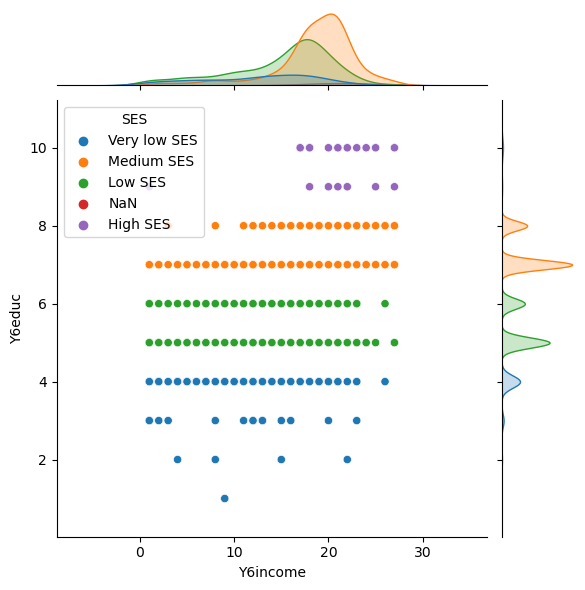

In [276]:
import seaborn as sns 
sns.jointplot(data=df_6y[df_6y['SES']!='NaN'], x="Y6income", y="Y6educ", hue="SES")

In [249]:
print (df.shape)

df = df.merge(df_6y, on="Y6origmiq", how="left")

print (df.shape)


(1135, 45)
(1135, 48)


In [253]:
df_SES = pd.get_dummies(df.SES.apply(pd.Series).stack()).sum(level=0)

df = pd.concat((df_SES, df), axis=1)

print (df.shape)


(1135, 53)


In [269]:
pred_df = df[['FA_6y','Y6origmiq','Gender', 'Urban', 'Low SES', 'Medium SES', 'High SES', 'Smoking',
       'Parent Atopic Condition', 'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter','SES']]

print(pred_df.FA_6y.value_counts(normalize=True))
pred_df = pred_df[pred_df['SES']!='NaN']       
print(pred_df.FA_6y.value_counts(normalize=True))

0    0.934802
1    0.065198
Name: FA_6y, dtype: float64
0    0.933641
1    0.066359
Name: FA_6y, dtype: float64


In [271]:
pred_df

,FA_6y,Y6origmiq,Gender,Urban,Low SES,Medium SES,High SES,Smoking,Parent Atopic Condition,First Born,Sibling Food Allergies,Percent of Siblings with Atopic,Infant Atopic Dermatitis,Infant Systemic Antibiotics,Season of birth: Autumn,Season of birth: Summer,Season of birth: Winter,SES
0,0,390,0,0,0,0,0,1,2.0,0,0.0,0.5,0,1,1.0,0.0,0.0,Very low SES
1,1,1445,0,1,0,1,0,0,0.0,0,1.0,1.0,0,0,0.0,0.0,1.0,Medium SES
2,0,2447,1,0,1,0,0,0,2.0,1,0.0,0.0,0,0,0.0,1.0,0.0,Low SES
3,0,2866,0,1,1,0,0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,Low SES
4,0,12331,0,1,0,1,0,0,2.0,0,1.0,1.0,1,0,0.0,1.0,0.0,Medium SES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,0,2693006,1,0,0,0,0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,Very low SES
1129,0,2698522,0,0,0,0,0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,Very low SES
1131,0,2703742,0,0,0,1,0,0,0.0,1,0.0,0.0,0,0,0.0,0.0,1.0,Medium SES
1132,0,2715662,0,1,0,1,0,0,0.0,0,0.0,0.0,0,0,0.0,0.0,1.0,Medium SES


In [270]:
feature_cols = ['Gender', 'Urban', 'Low SES', 'Medium SES', 'High SES', 'Smoking',
       'Parent Atopic Condition', 'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter']
X = pred_df[feature_cols] # Features
y = pred_df['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))


[[802 211]
 [ 39  33]]
Accuracy: 0.7695852534562212
Precision: 0.13524590163934427
Recall: 0.4583333333333333
roc_auc_score: 0.6597564988483053


In [273]:
df[['Very low SES','FA_6y']].value_counts(normalize=False)

Very low SES  FA_6y
0             0        937
1             0        124
0             1         71
1             1          3
dtype: int64

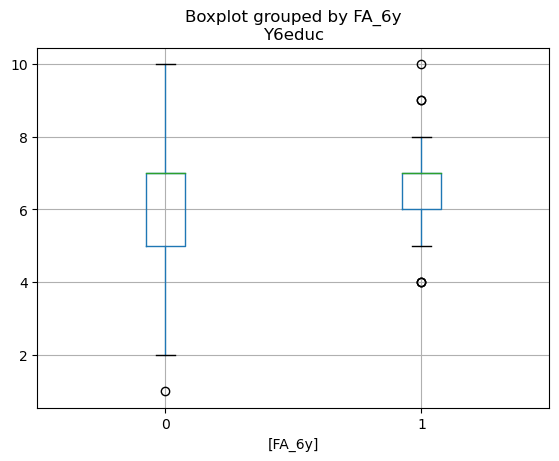

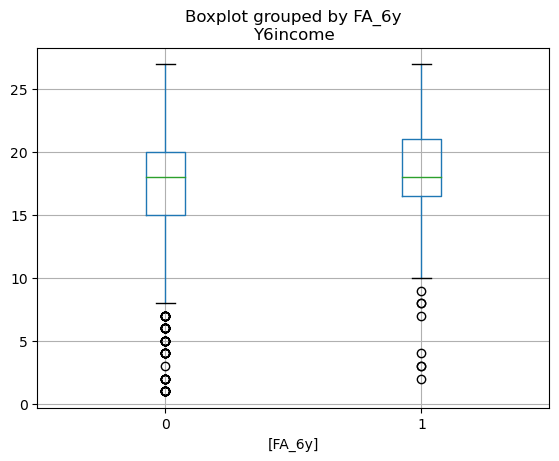

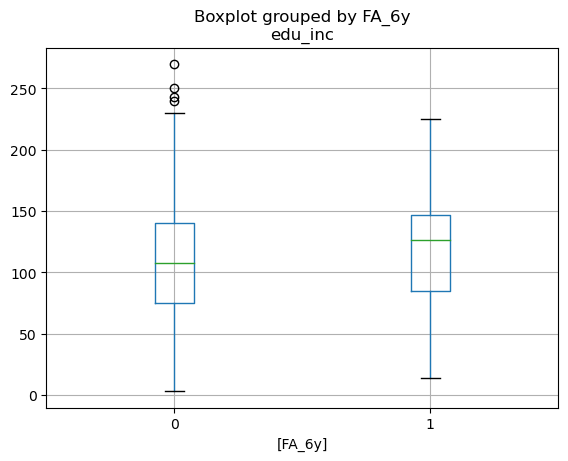

In [295]:
boxplot = df.boxplot(column=['Y6educ'], by=['FA_6y'])
boxplot = df.boxplot(column=['Y6income'], by=['FA_6y'])
df['edu_inc'] = df['Y6income']*df['Y6educ']
boxplot = df.boxplot(column=['edu_inc'], by=['FA_6y'])

array([[<AxesSubplot:title={'center':'edu_inc'}>]], dtype=object)

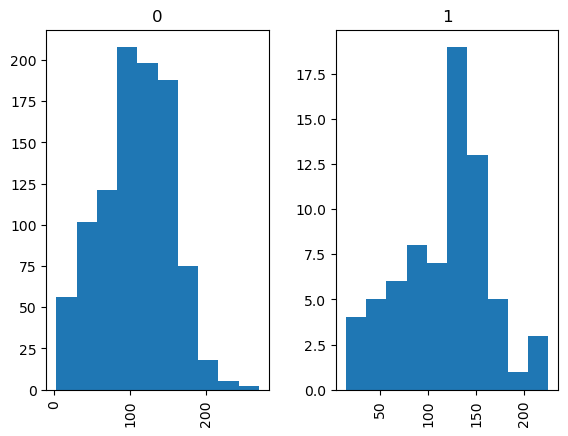

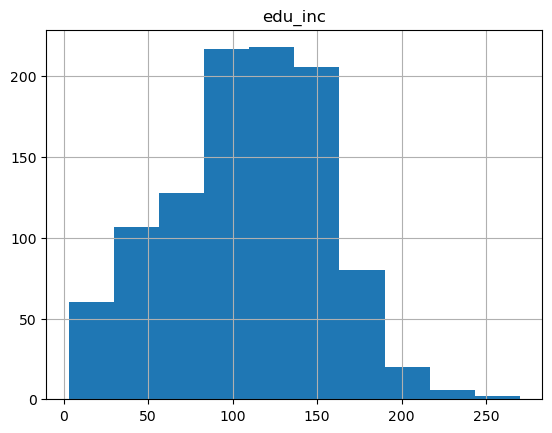

In [297]:
df.hist(column=['edu_inc'], by=['FA_6y'])
df.hist(column=['edu_inc'])

In [299]:
df.edu_inc.describe()


count    1044.000000
mean      108.337165
std        46.740254
min         3.000000
25%        75.000000
50%       112.000000
75%       144.000000
max       270.000000
Name: edu_inc, dtype: float64

In [300]:
np.percentile(df.edu_inc, 25) 

nan

In [301]:
def ses_fun(x):
    val = []
    if x<=75 :
      val ='Very low SES'
    elif x<=112:
      val = 'Low SES'
    elif x<=144:
      val = 'Medium SES'
    elif x<=270:
      val = 'High SES'
    else:
      val = 'NaN'
    return val 


df['SES'] = df.edu_inc.apply(lambda x: ses_fun(x))

In [303]:
df['SES'].value_counts()

Low SES         270
Very low SES    267
High SES        255
Medium SES      252
NaN              91
Name: SES, dtype: int64

In [318]:
pred_df = df[['FA_6y','Y6origmiq','Gender', 'Urban', 'Smoking',
       'Parent Atopic Condition', 'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter','SES']]

print(pred_df.FA_6y.value_counts(normalize=True))
pred_df = pred_df[pred_df['SES']!='NaN']       
print(pred_df.FA_6y.value_counts(normalize=True))

0    0.934802
1    0.065198
Name: FA_6y, dtype: float64
0    0.931992
1    0.068008
Name: FA_6y, dtype: float64


In [319]:
df_SES = pd.get_dummies(pred_df.SES.apply(pd.Series).stack()).sum(level=0)

pred_df = pd.concat((df_SES, pred_df), axis=1)

print (pred_df.shape)

(1044, 19)


In [320]:
feature_cols = ['Gender', 'Urban', 'Low SES', 'Medium SES', 'High SES', 'Smoking',
       'Parent Atopic Condition', 'First Born', 'Sibling Food Allergies',
       'Percent of Siblings with Atopic', 'Infant Atopic Dermatitis',
       'Infant Systemic Antibiotics', 'Season of birth: Autumn',
       'Season of birth: Summer', 'Season of birth: Winter']
X = pred_df[feature_cols] # Features
y = pred_df['FA_6y']

y_pred = (meta.predict(X) >= 0.25).astype('float')

#model result
cnf_matrix = confusion_matrix(y, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))
print ("roc_auc_score:",roc_auc_score(y, meta.predict(X)))

[[780 193]
 [ 43  28]]
Accuracy: 0.7739463601532567
Precision: 0.12669683257918551
Recall: 0.39436619718309857
roc_auc_score: 0.6507100154886152
